In [1]:
!nvidia-smi

Fri Nov 21 08:37:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Next, we'll upload our dataset and prepare it for training with YOLO. We'll split the dataset into train and validation folders, and we'll automatically generate the configuration file for training the model.

# 1. Set up data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [9]:
! cp /content/gdrive/MyDrive/sport_hackt/data72_final.zip /content

In [10]:
# Unzip images to a custom data folder
! unzip -q /content/data72_final.zip -d /content/custom_data

# 2. Train and validation split

Ultralytics requires a particular folder structure to store training data for models. Ultralytics requires a particular folder structure to store training data for models. The root folder is named “data”. Inside, there are two main folders:

*   **Train**: These are the actual images used to train the model. In one epoch of training, every image in the train set is passed into the neural network. The training algorithm adjusts the network weights to fit the data in the images.


*   **Validation**: These images are used to check the model's performance at the end of each training epoch.

In each of these folders is a “images” folder and a “labels” folder, which hold the image files and annotation files respectively.

In [4]:
! cp /content/gdrive/MyDrive/sport_hackt/train_val_split.py /content

In [11]:

! python train_val_split.py --datapath="/content/custom_data/data" --train_pct=0.75

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 205
Number of annotation files: 205
Images moving to train: 153
Images moving to validation: 52


# 3. Install Requirements (Ultralytics)

Used to train YOLO


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.0 MB/s eta 0:00:00


# 4.&nbsp;Configure Training


We need to create the Ultralytics training configuration YAML file. This file specifies the location of your train and validation data, and it also defines the model's classes. An example configuration file model is available [here](https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco128.yaml).

Run the code block below to automatically generate a `data.yaml` configuration file. Make sure you have a labelmap file located at `custom_data/data/classes.txt`.

In [14]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 71
names:
- adidas
- albatros
- allianz
- american express
- antom
- aok
- apotalde
- audi
- avaay
- balnovade
- barmenia
- barmenia gothaer
- betano
- bitburger
- bitpanda
- blaklader
- comedycentral
- condor
- contienentals
- deutschebank
- dv system
- dvag
- dws
- ebay
- edeka
- emirates
- ergo
- flyeralarm
- freshfoodz
- gebhardt
- gridstore
- hormann
- hyundai
- kempf led
- kermi
- kleber
- lidl
- lotto
- mainova
- mewa
- new balance
- niedex
- paulner
- pepsi
- prezero
- puma
- raisin
- reuter
- rewe
- rinti
- rmv
- robomarket
- samsung
- santander
- sap
- sauter
- smartbroker
- sonepar
- sovanta
- sparkasse
- sportwetten
- t
- viessmann
- volksbank
- vonovia
- vw
- wiesenhof
- wurth
- xmcyber
- yorem
- zalando


# 5.&nbsp;Train Model

## 5.1 Training Parameters

**Model architecture & size (`model`):**
YOLO11 models sizes available to train, including `yolo11n.pt`, `yolo11s.pt`, `yolo11m.pt`, `yolo11l.pt`, and `yolo11xl.pt`.

**Resolution (`imgsz`)**

Resolution has a large impact on the speed and accuracy of the model: a lower resolution model will have higher speed but less accuracy. YOLO models are typically trained and inferenced at a 640x640 resolution. However, if you want your model to run faster or know you will be working with low-resolution images, try using a lower resolution like 480x480.


## 5.2 Run Training!

Run the following code block to begin training. If you want to use a different model, number of epochs, or resolution, change `model`, `epochs`, or `imgsz`.

In [ ]:
# !yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=90 imgsz=640

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

The training algorithm will parse the images in the training and validation directories and then start training the model. At the end of each training epoch, the program runs the model on the validation dataset and reports the resulting mAP, precision, and recall. As training continues, the mAP should generally increase with each epoch. Training will end once it goes through the number of epochs specified by `epochs`.

> **NOTE:** Make sure to allow training to run to completion, because an optimizer runs at the end of training that strips out unneeded layers from the model.

The best trained model weights will be saved in `content/runs/detect/train/weights/best.pt`. Additional information about training is saved in the `content/runs/detect/train` folder, including a `results.png` file that shows how loss, precision, recall, and mAP progressed over each epoch.

#6.&nbsp;Test Model

In [8]:
! cp /content/gdrive/MyDrive/sport_hackt/best.pt /content

In [29]:
# !yolo detect predict model=/content/runs/detect/train/weights/best.pt source=data/validation/images save=True

!yolo detect predict model=/content/best.pt source=data/validation/images save=True

Ultralytics 8.3.229 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,334,053 parameters, 0 gradients, 86.9 GFLOPs

image 1/52 /content/data/validation/images/004fbffa-Screenshot_from_2025-11-20_12-24-14.png: 384x640 4 emiratess, 8 ts, 70.3ms
image 2/52 /content/data/validation/images/020b6a2b-Screenshot_from_2025-11-20_12-00-52.png: 384x640 1 adidas, 1 t, 31.1ms
image 3/52 /content/data/validation/images/07669fa1-Screenshot_from_2025-11-20_22-22-07.png: 352x640 2 bitburgers, 56.1ms
image 4/52 /content/data/validation/images/15030b93-Screenshot_from_2025-11-20_22-06-41.png: 352x640 1 niedex, 30.0ms
image 5/52 /content/data/validation/images/18823af6-Screenshot_from_2025-11-20_12-17-00.png: 384x640 2 adidass, 31.8ms
image 6/52 /content/data/validation/images/21747d16-Screenshot_from_2025-11-20_22-49-07.png: 352x640 1 american express, 13 dv systems, 2 hormanns, 4 hyundais, 1 lotto, 1 mainova, 30.6ms
image 7/52 /content/data/validation

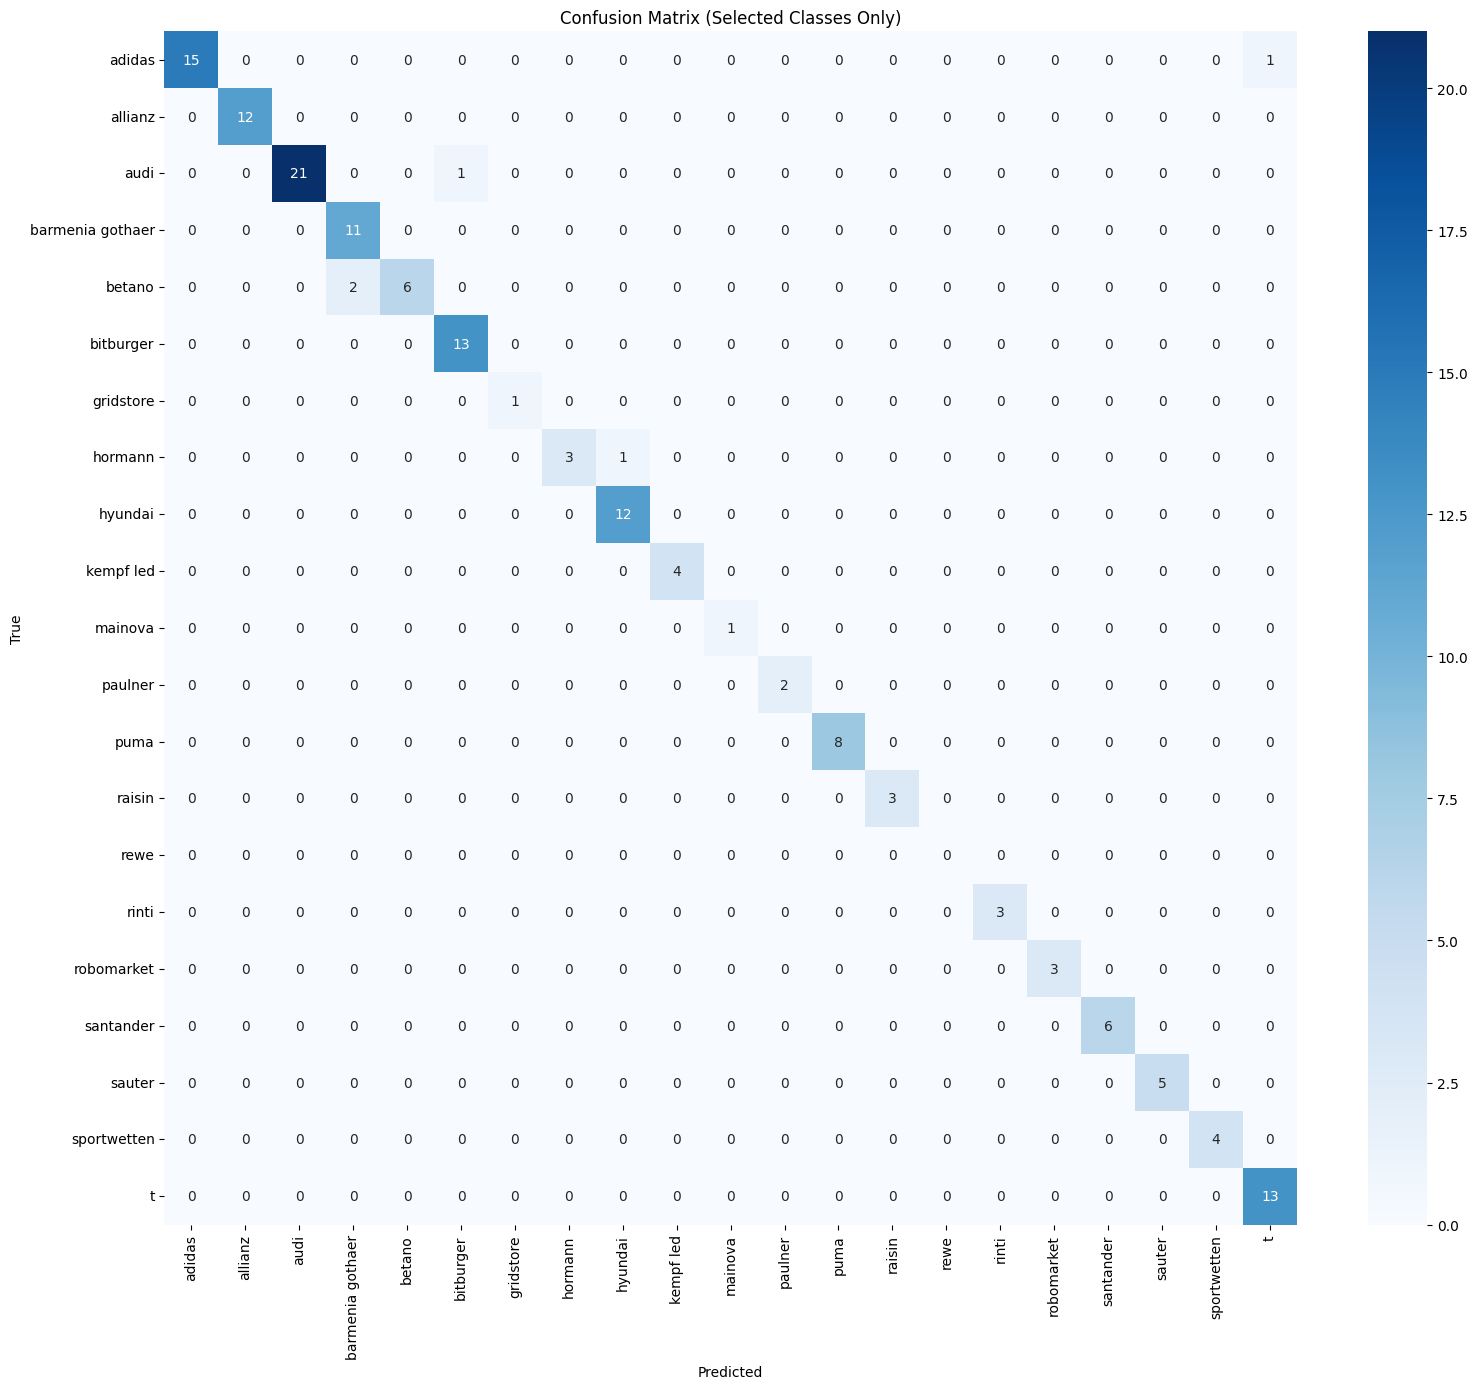

In [26]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import torch

# ---------------------------
# SEED FOR REPRODUCIBILITY
# ---------------------------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# ---------------------------
# 1. LOAD MODEL
# ---------------------------
model = YOLO("/content/best.pt")

# Validation dataset
val_img_dir = "/content/data/validation/images"
val_label_dir = "/content/data/validation/labels"

# Run inference on validation images
preds = model.predict(
    source=val_img_dir,
    conf=0.25,
    imgsz=640,
    verbose=False
)

# ---------------------------
# 2. IoU FUNCTION
# ---------------------------
def box_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    inter = max(0, xB - xA) * max(0, yB - yA)
    if inter <= 0:
        return 0.0
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    return inter / (box1_area + box2_area - inter)


# ---------------------------
# 3. INITIALIZE CONFUSION MATRIX
# ---------------------------
num_classes = len(model.names)
cm = np.zeros((num_classes, num_classes), dtype=int)

# ---------------------------
# 4. PARSE GT + PRED
# ---------------------------
for r in preds:
    img_path = r.path
    img_h, img_w = r.orig_shape

    label_path = img_path.replace("images", "labels")
    label_path = os.path.splitext(label_path)[0] + ".txt"

    gt_boxes, gt_classes = [], []

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                cid, x, y, w, h = map(float, line.split())
                cid = int(cid)
                x1 = (x - w/2) * img_w
                x2 = (x + w/2) * img_w
                y1 = (y - h/2) * img_h
                y2 = (y + h/2) * img_h
                gt_boxes.append([x1, y1, x2, y2])
                gt_classes.append(cid)

    pred_boxes = r.boxes.xyxy.cpu().numpy() if r.boxes is not None else []
    pred_classes = r.boxes.cls.cpu().numpy().astype(int) if r.boxes is not None else []

    matched_gt = set()
    matched_pred = set()

    for pi, pbox in enumerate(pred_boxes):
        best_iou = 0
        best_gt = -1
        for gi, gbox in enumerate(gt_boxes):
            iou = box_iou(pbox, gbox)
            if iou > best_iou:
                best_iou = iou
                best_gt = gi

        if best_iou >= 0.5:
            gt_c = gt_classes[best_gt]
            pr_c = pred_classes[pi]
            cm[gt_c, pr_c] += 1
            matched_gt.add(best_gt)
            matched_pred.add(pi)

# ---------------------------
# 5. FILTER CLASSES TO KEEP
# ---------------------------
keep_ids = [
  0, 2, 7, 11, 12, 13,
  30, 31, 32, 33,
  38, 42,
  45, 46, 48, 49, 51, 53, 55,
  60, 61
]


keep_labels = [model.names[i] for i in keep_ids]

cm_subset = cm[np.ix_(keep_ids, keep_ids)]
cm_df = pd.DataFrame(cm_subset, index=keep_labels, columns=keep_labels)

# ---------------------------
# 6. HEATMAP
# ---------------------------
plt.figure(figsize=(16, 14))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Selected Classes Only)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


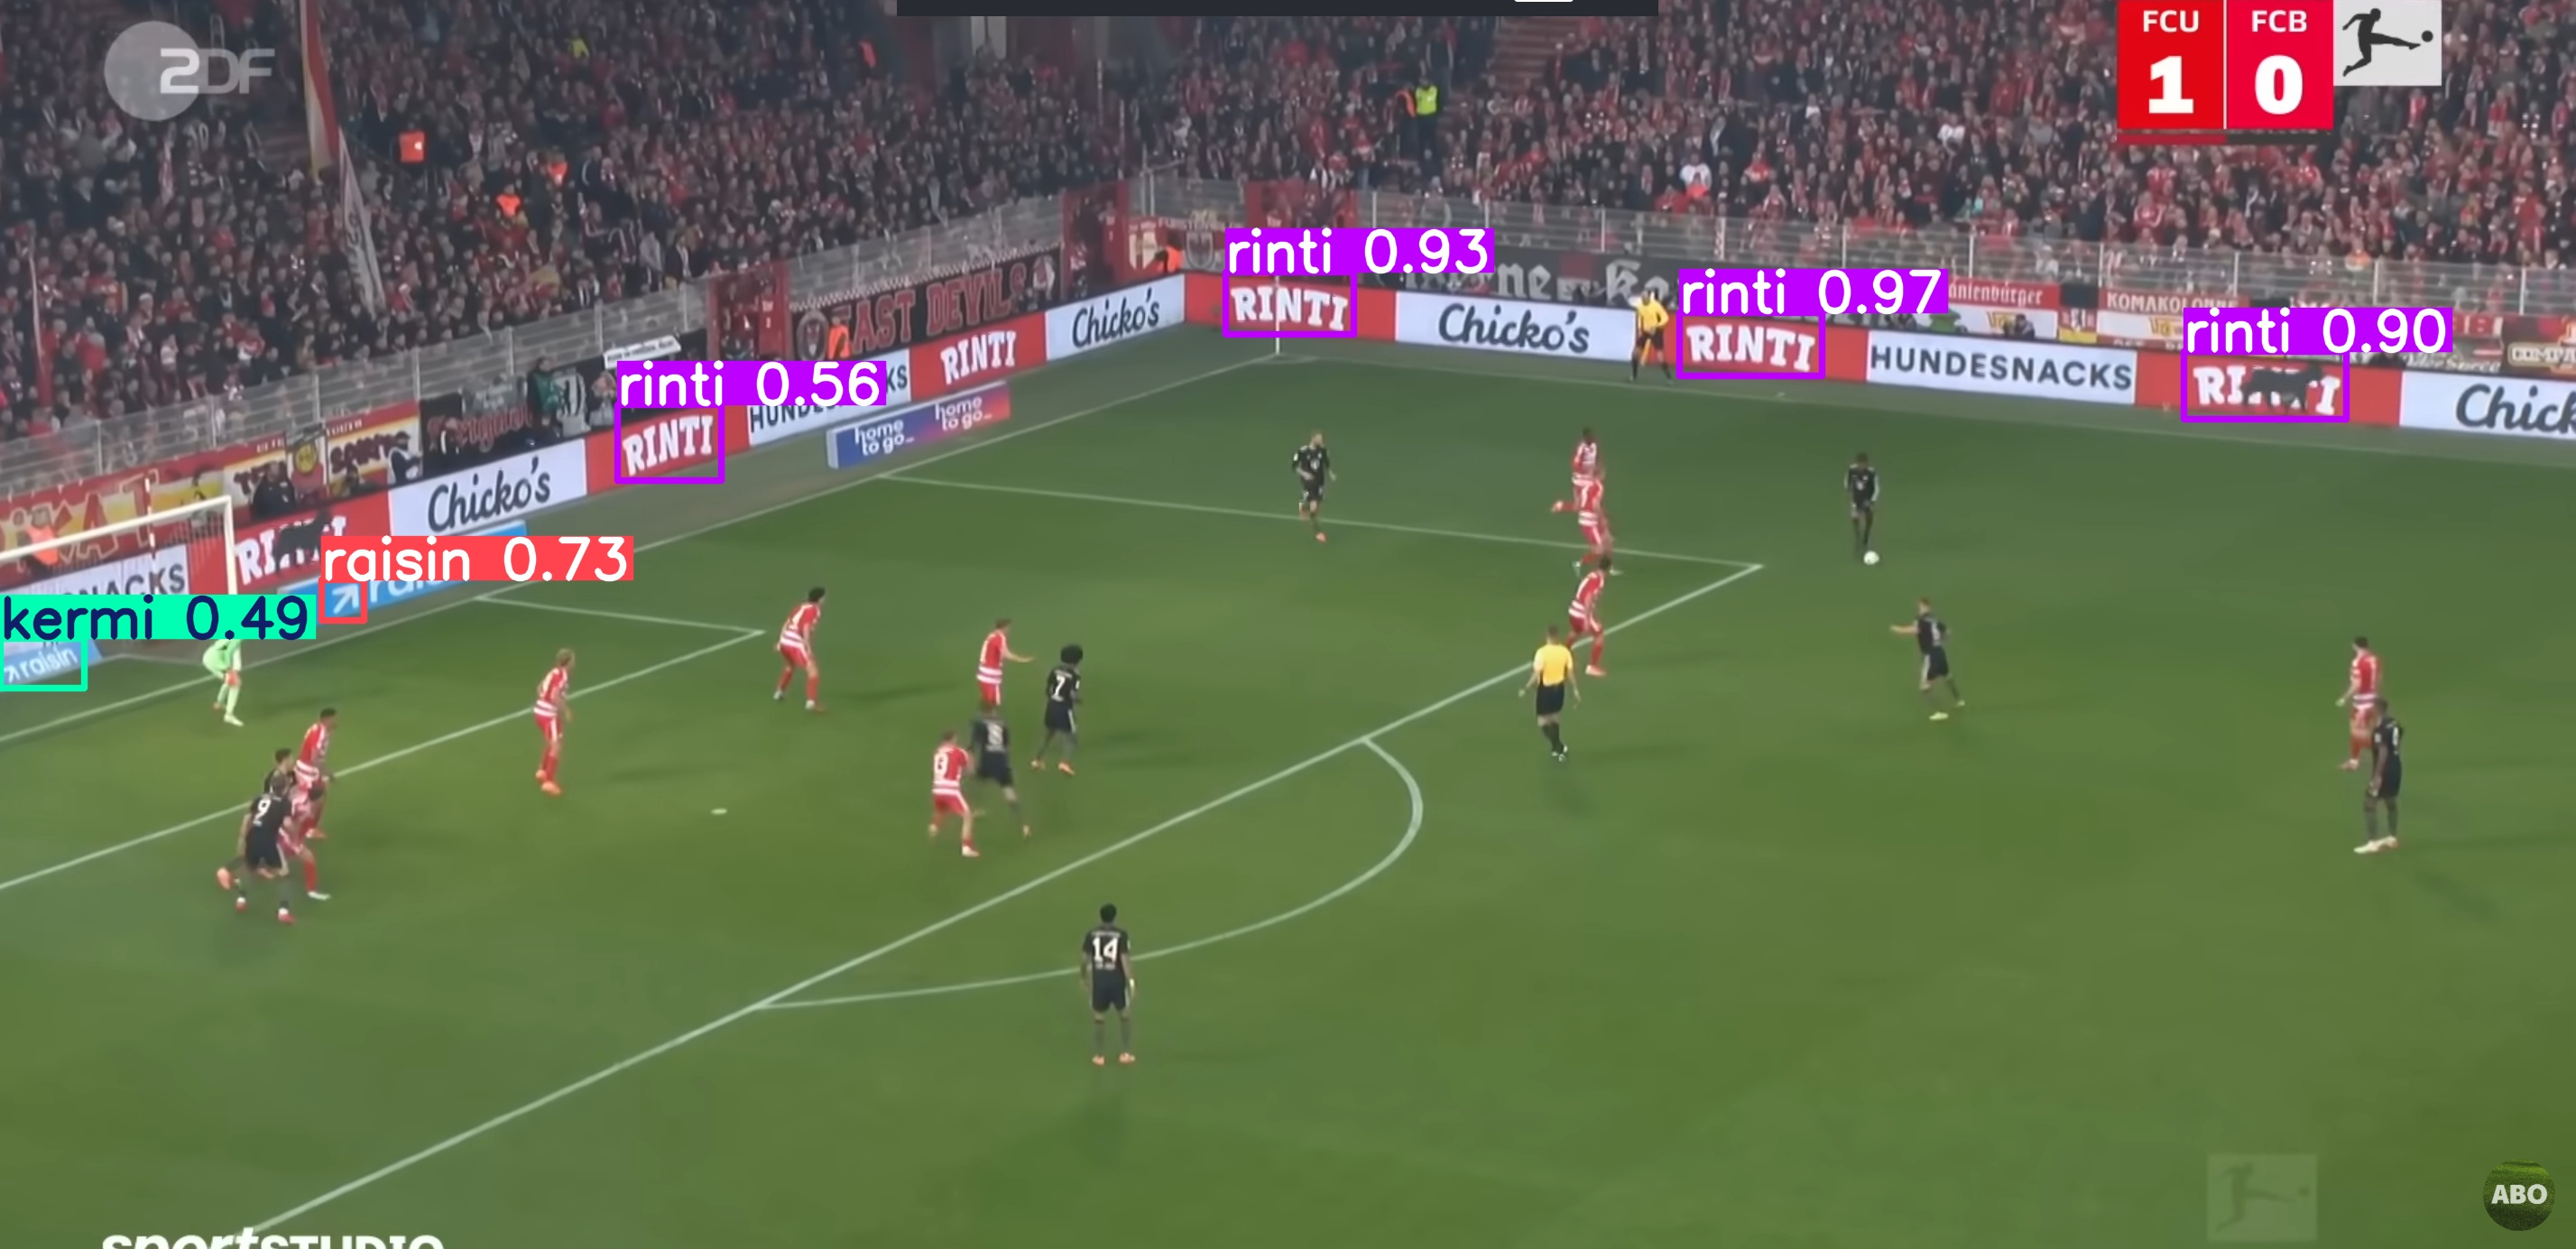

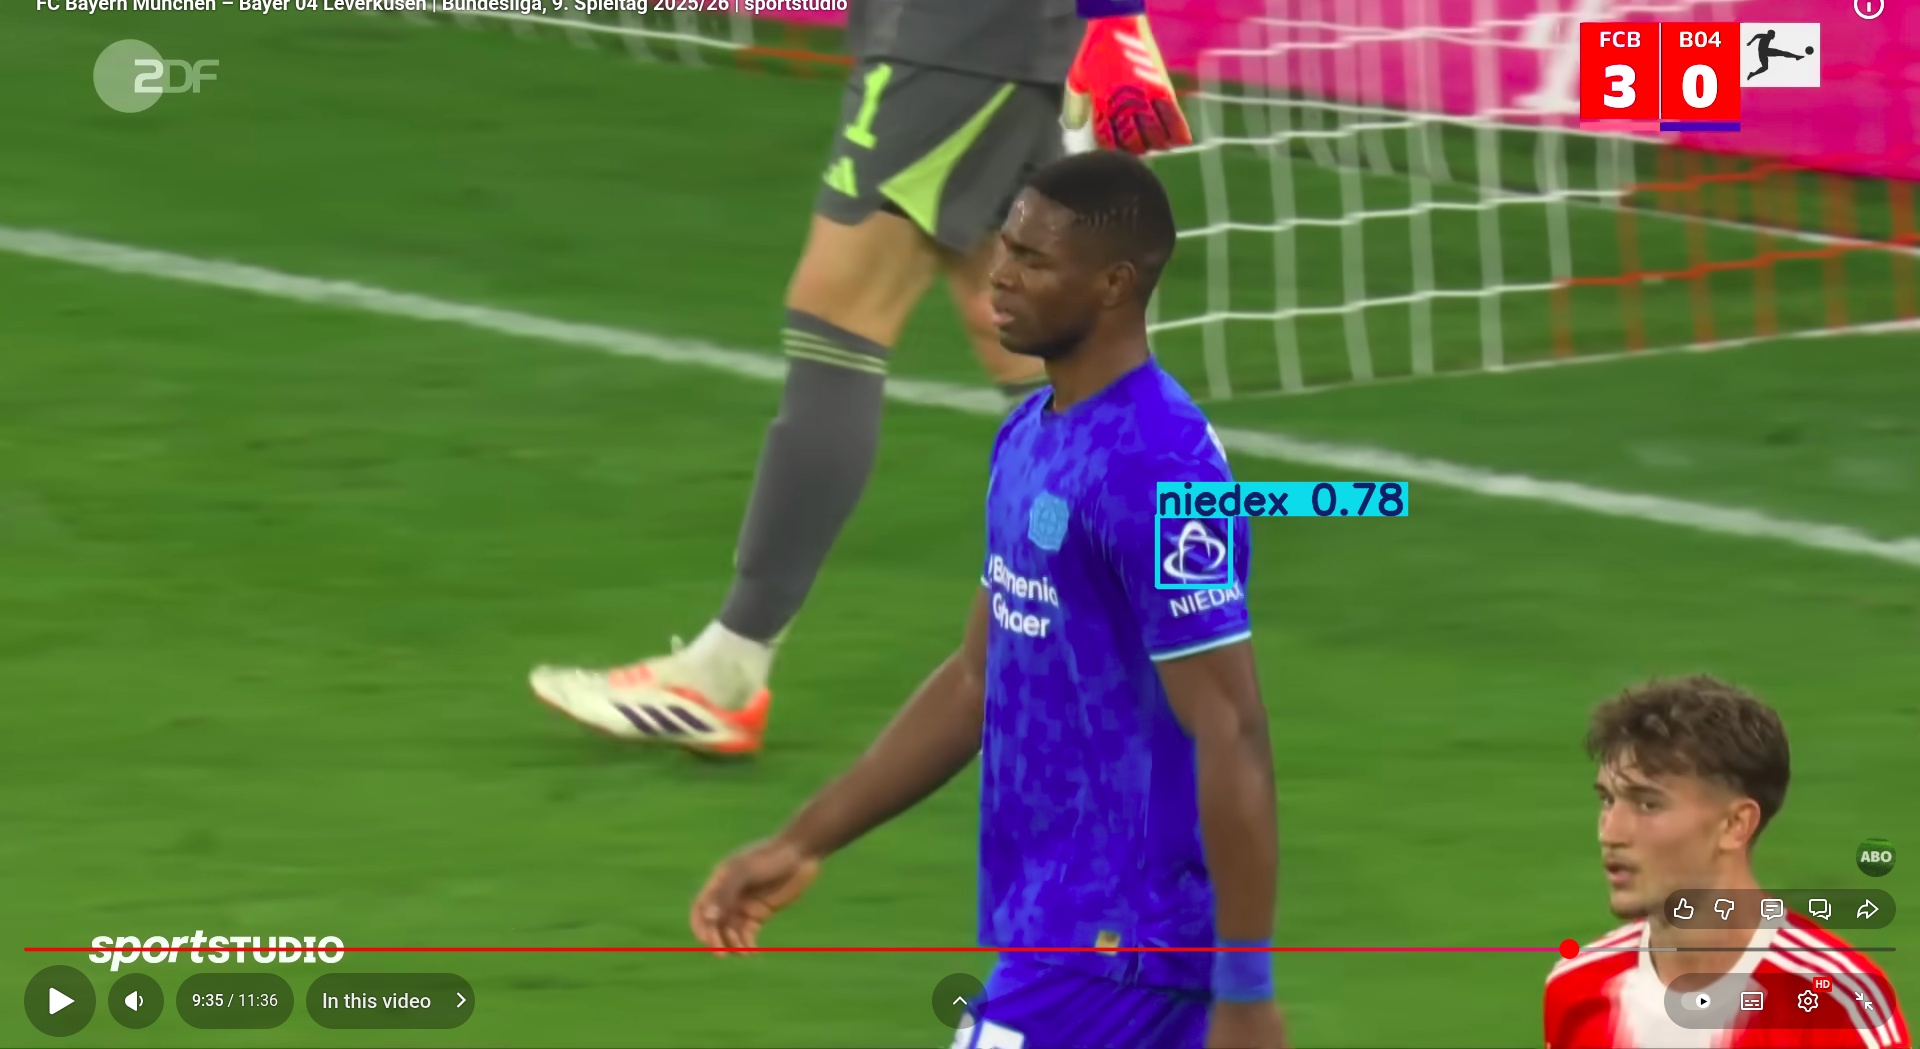

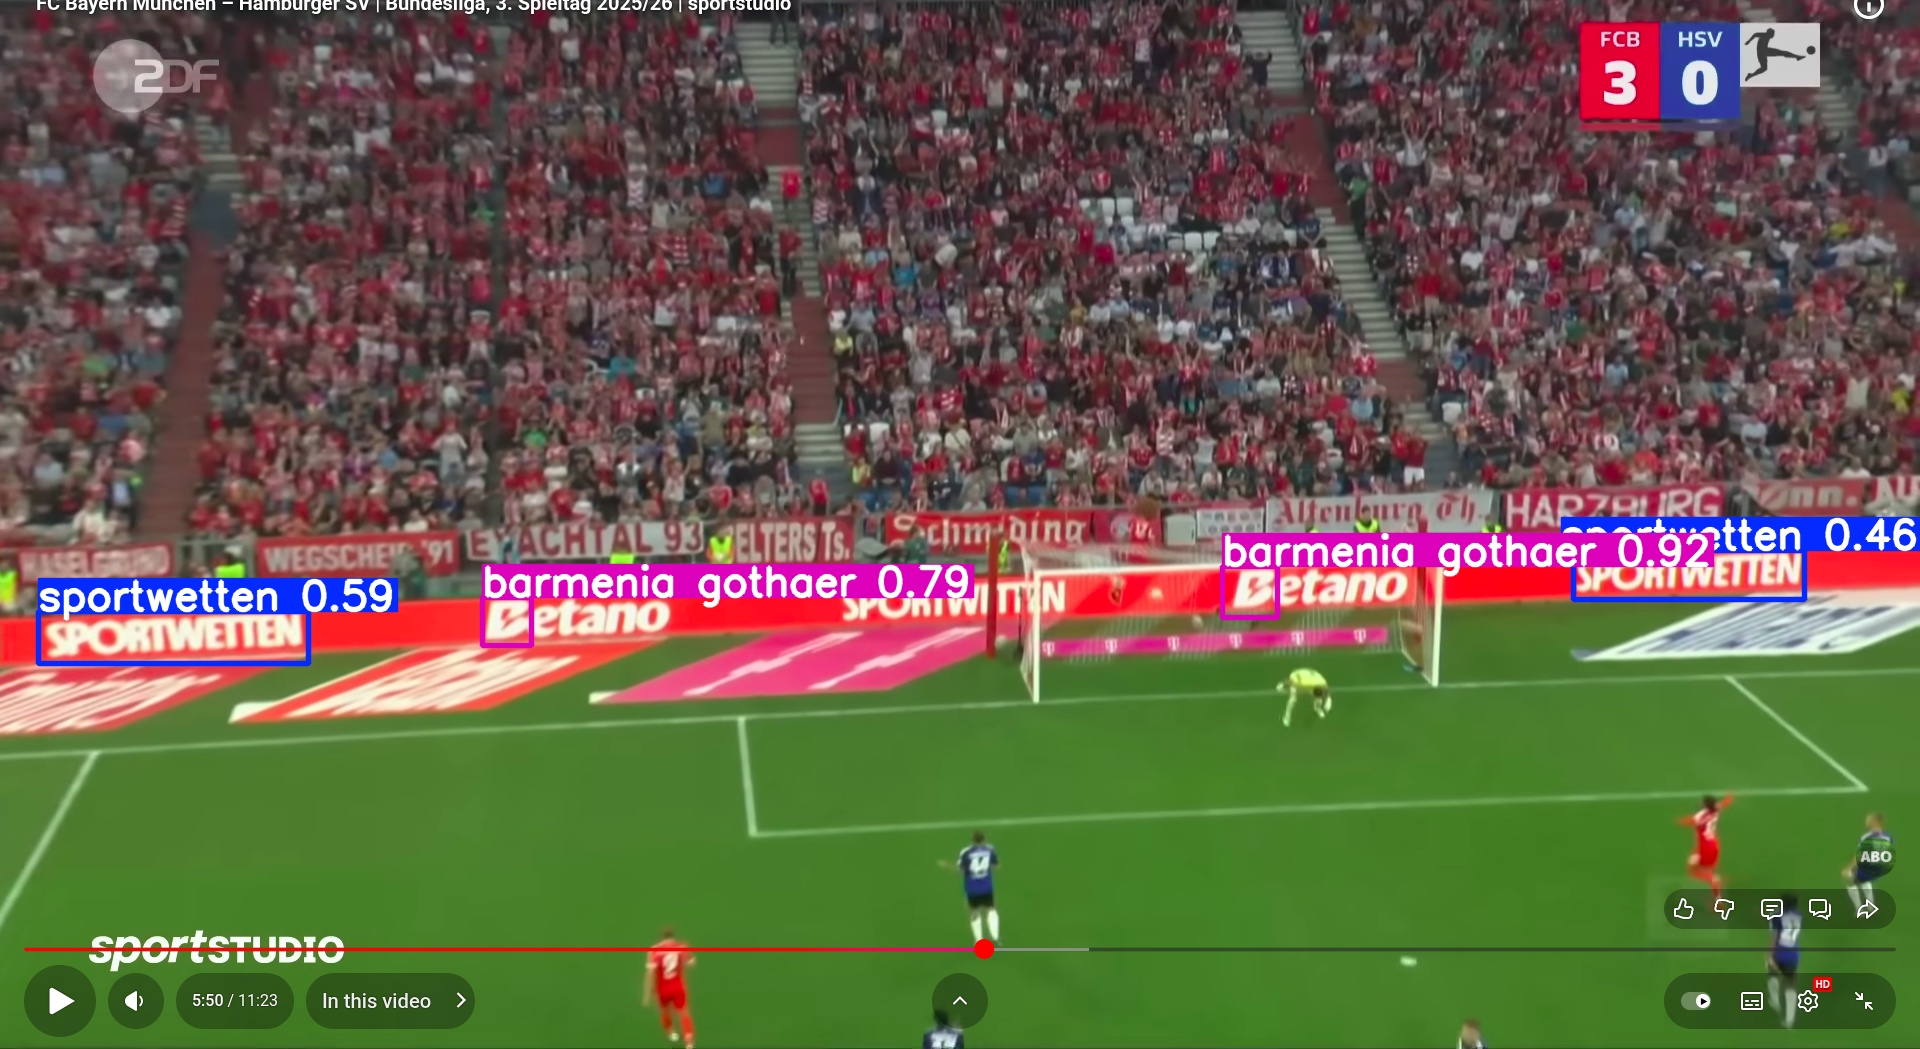

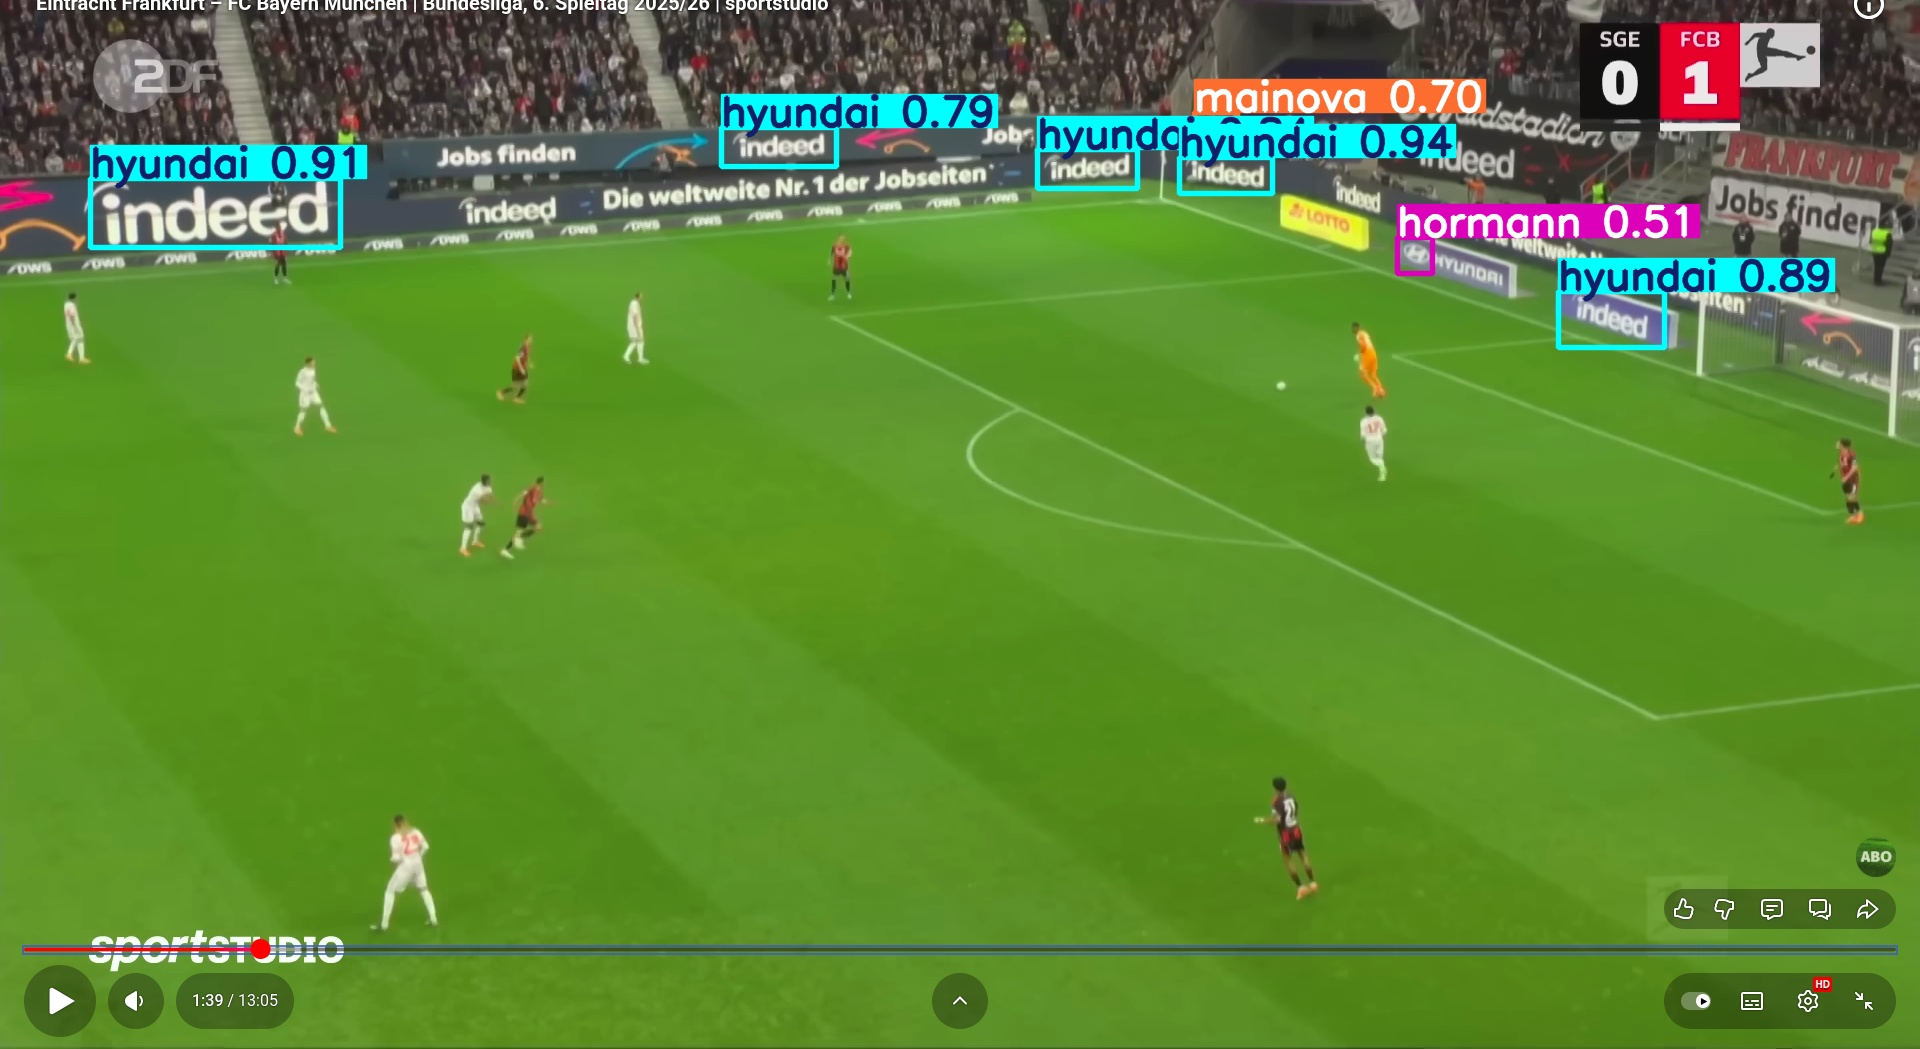

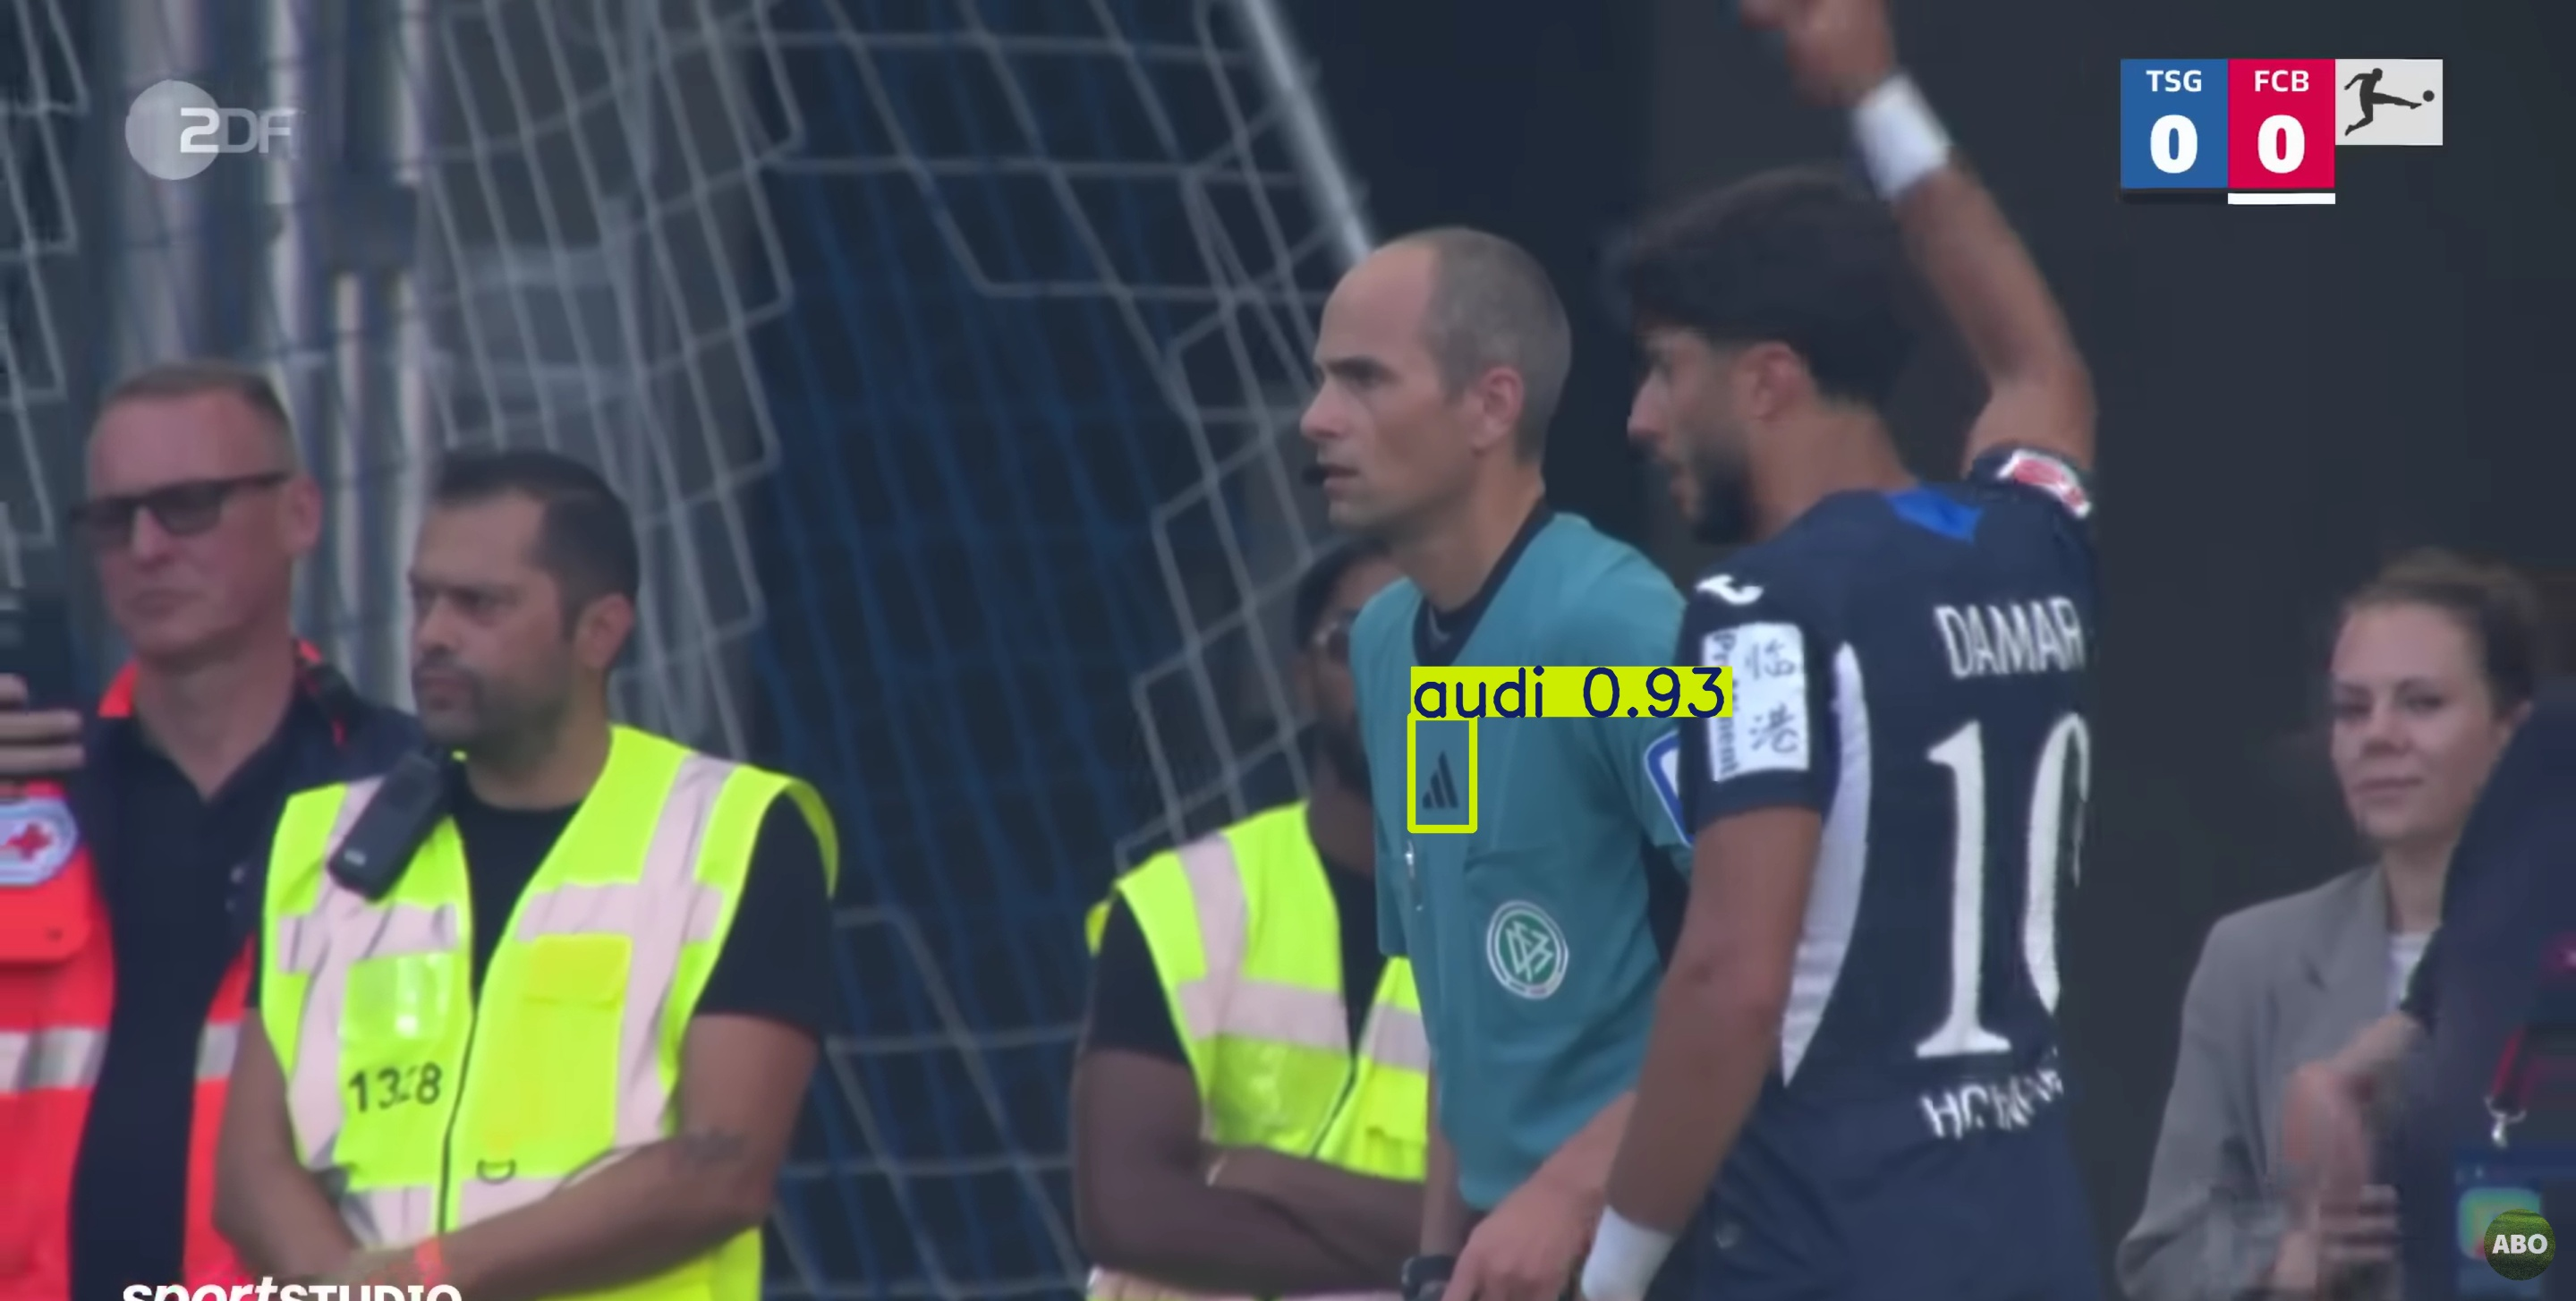

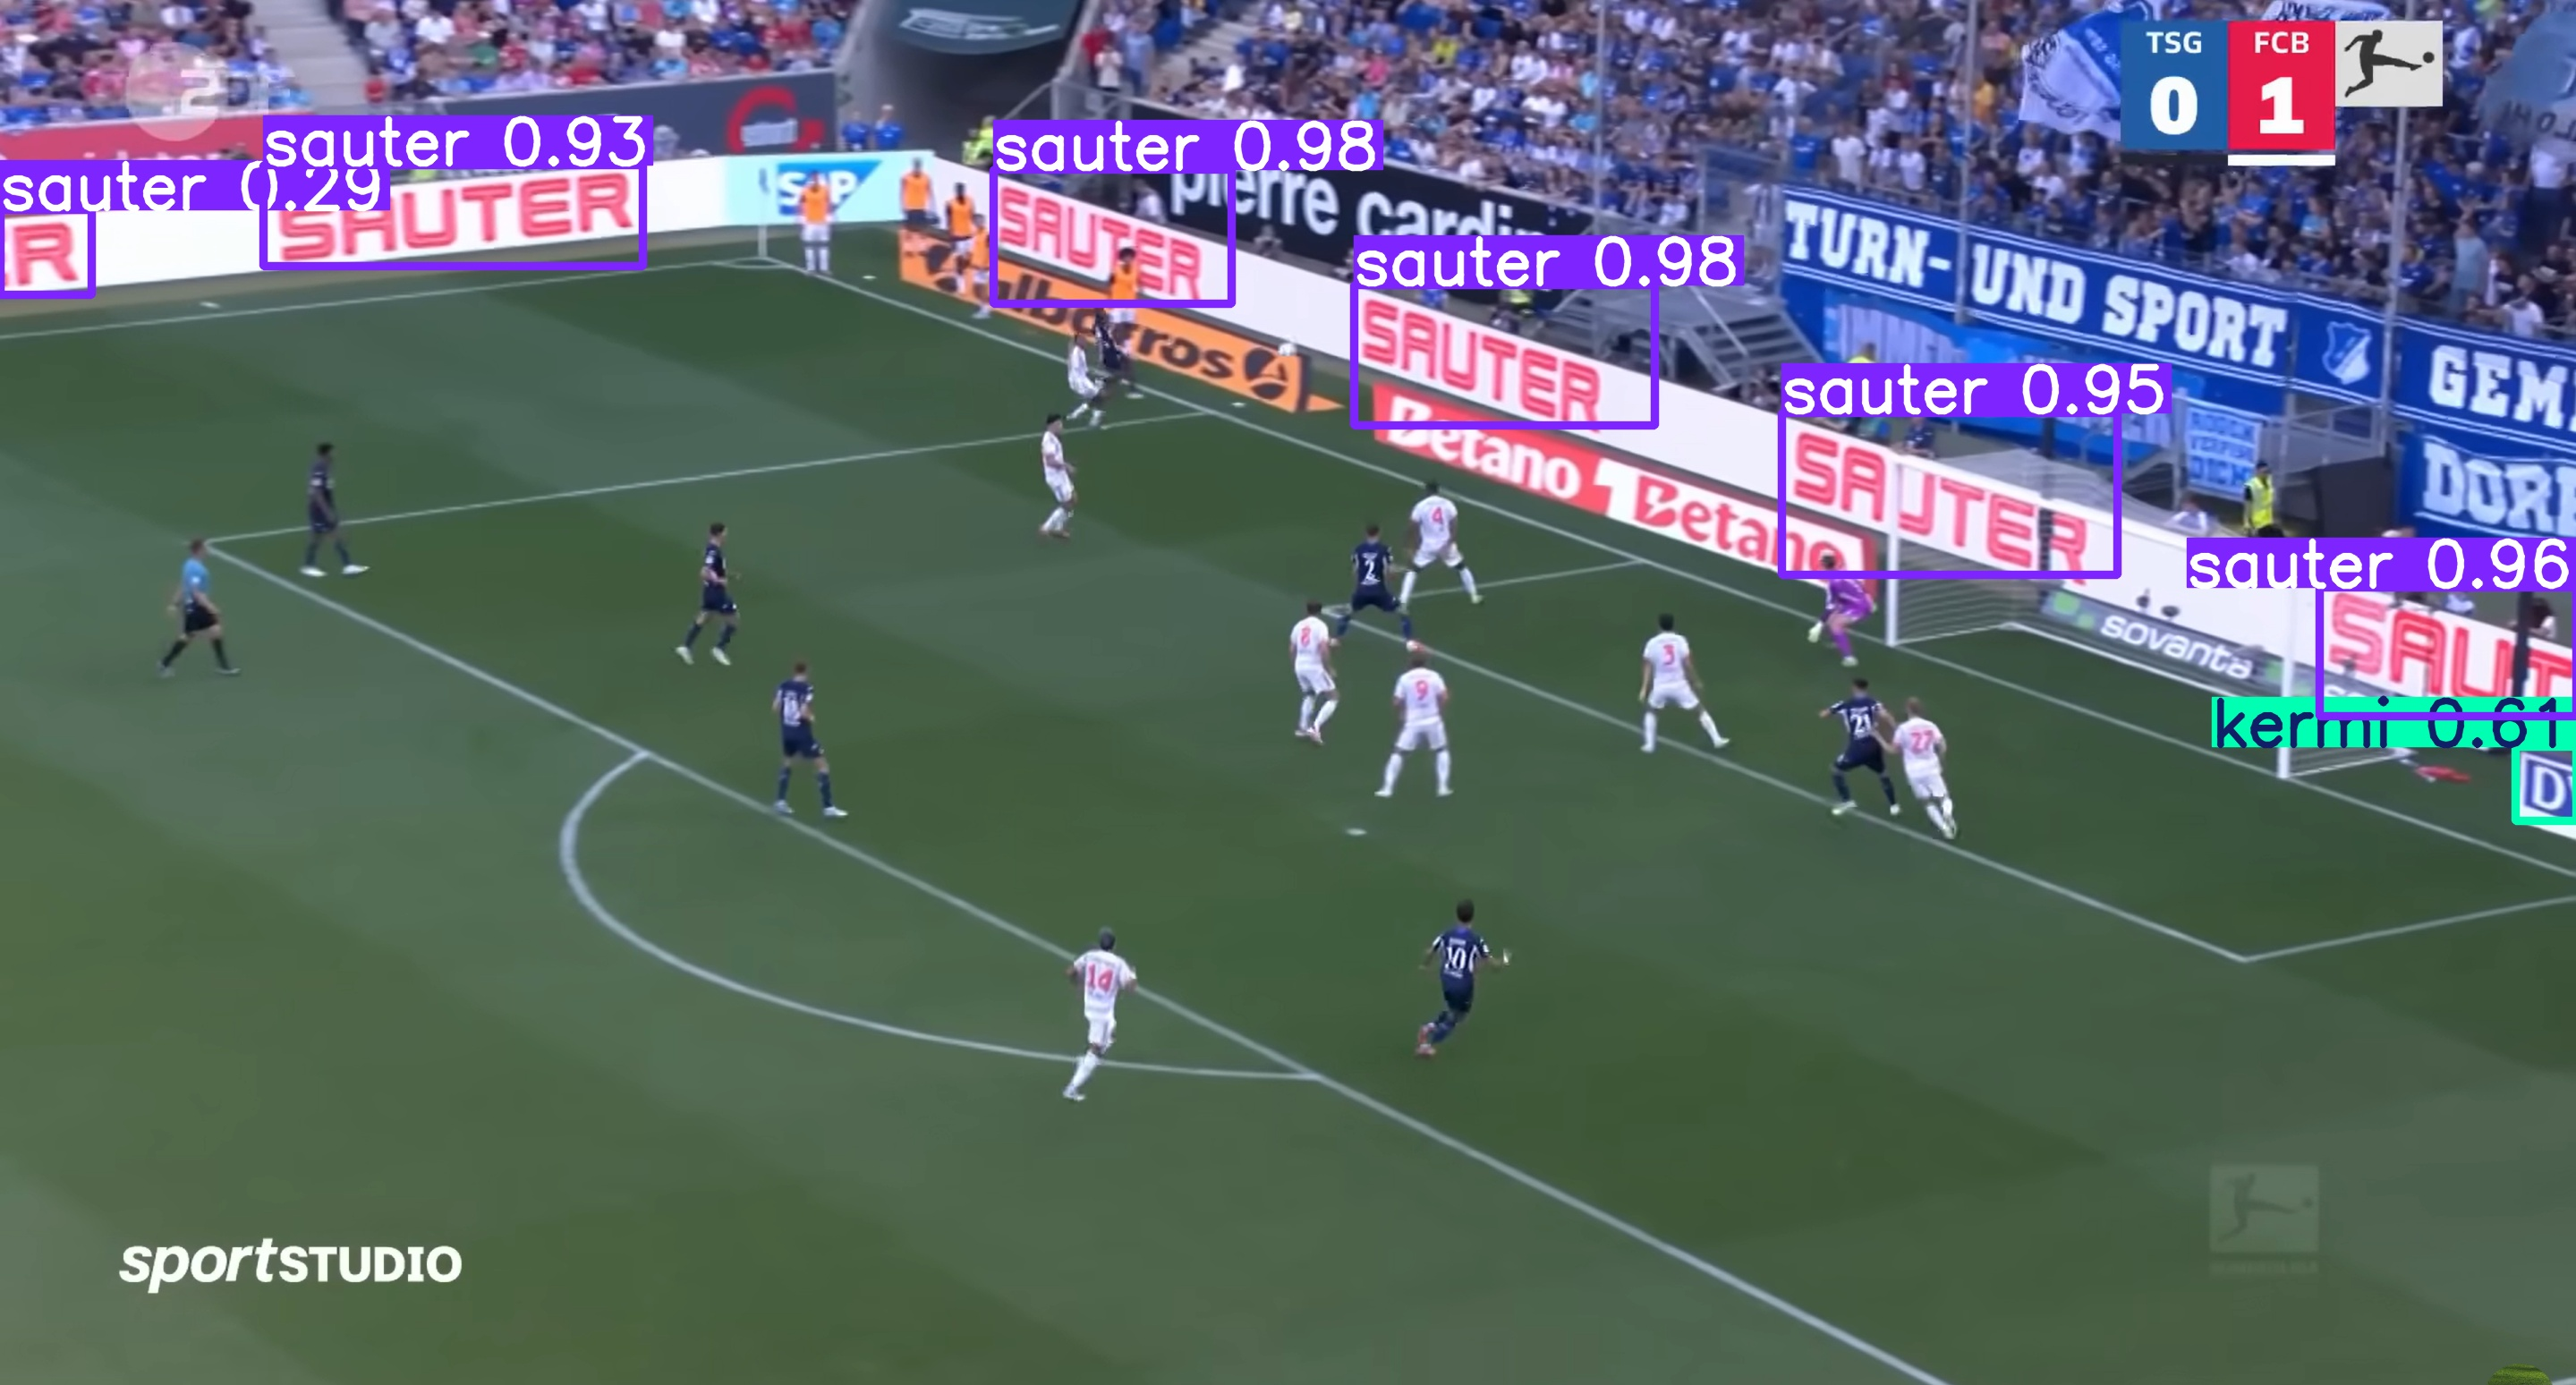

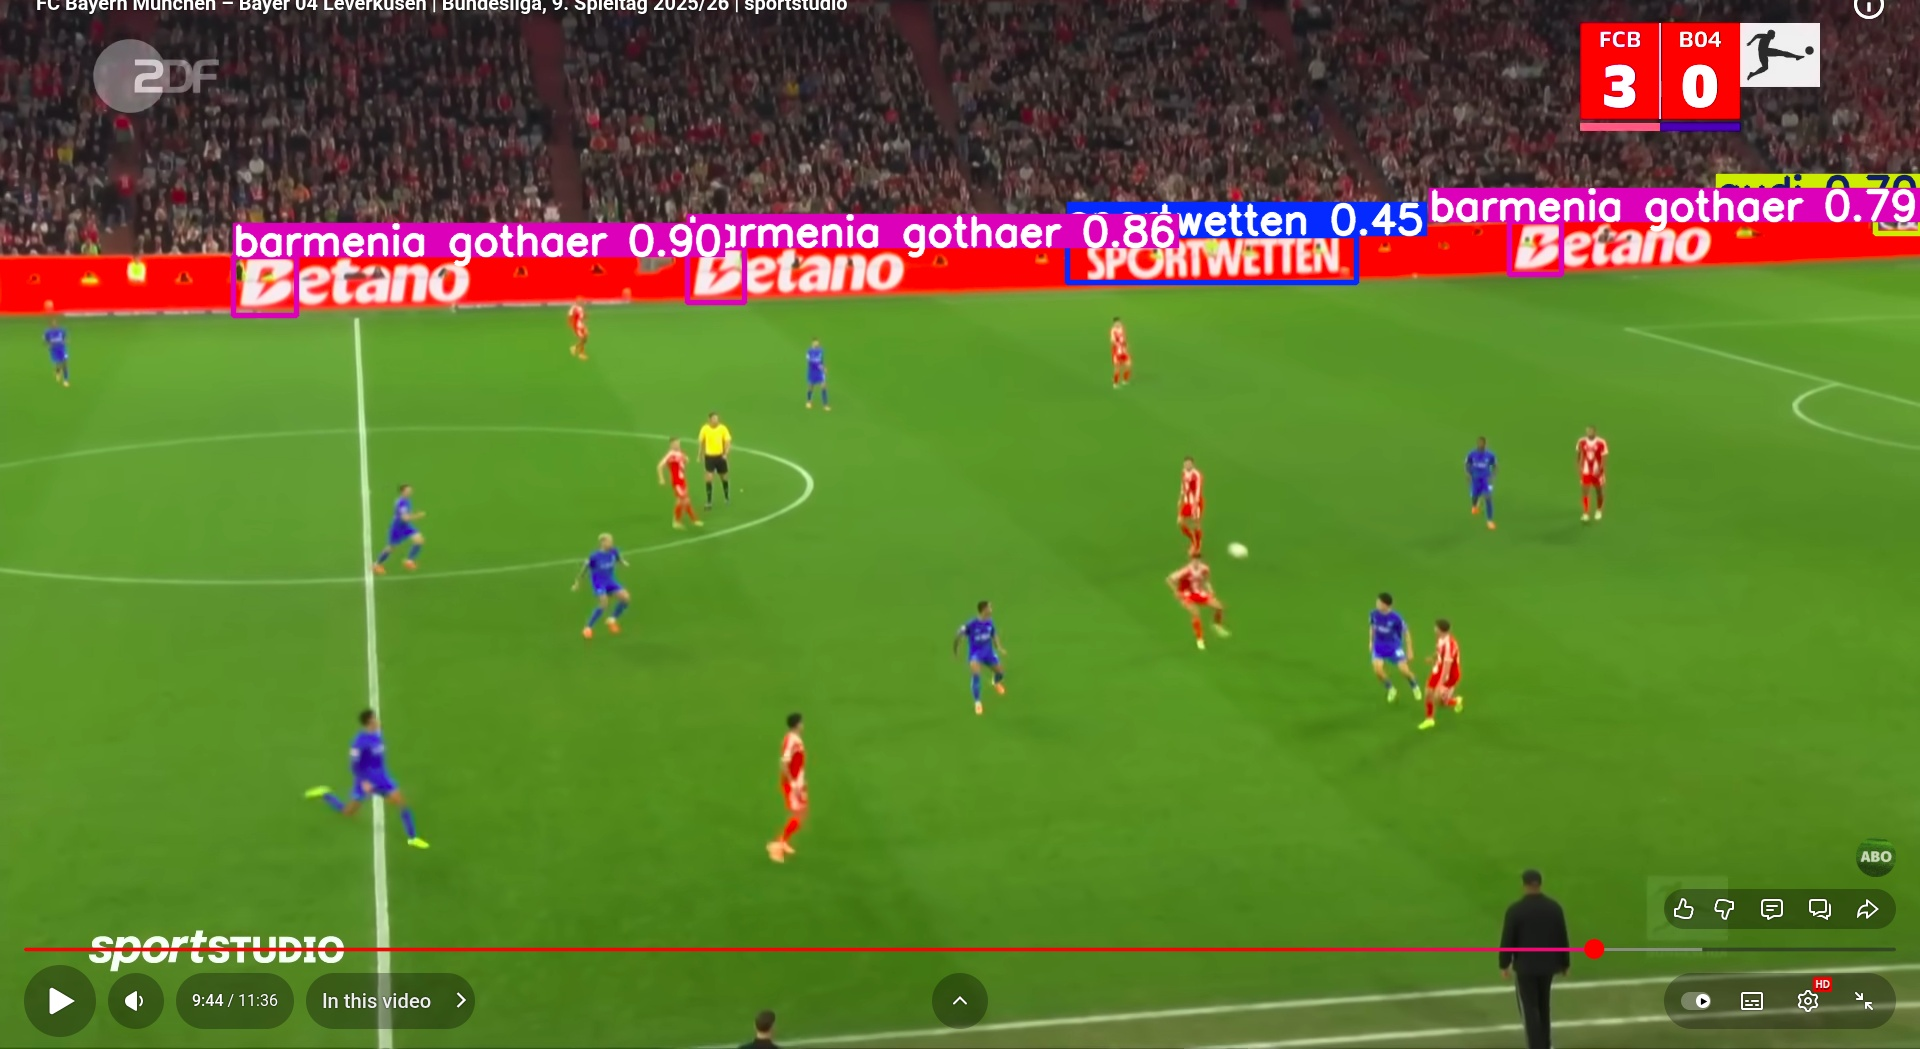

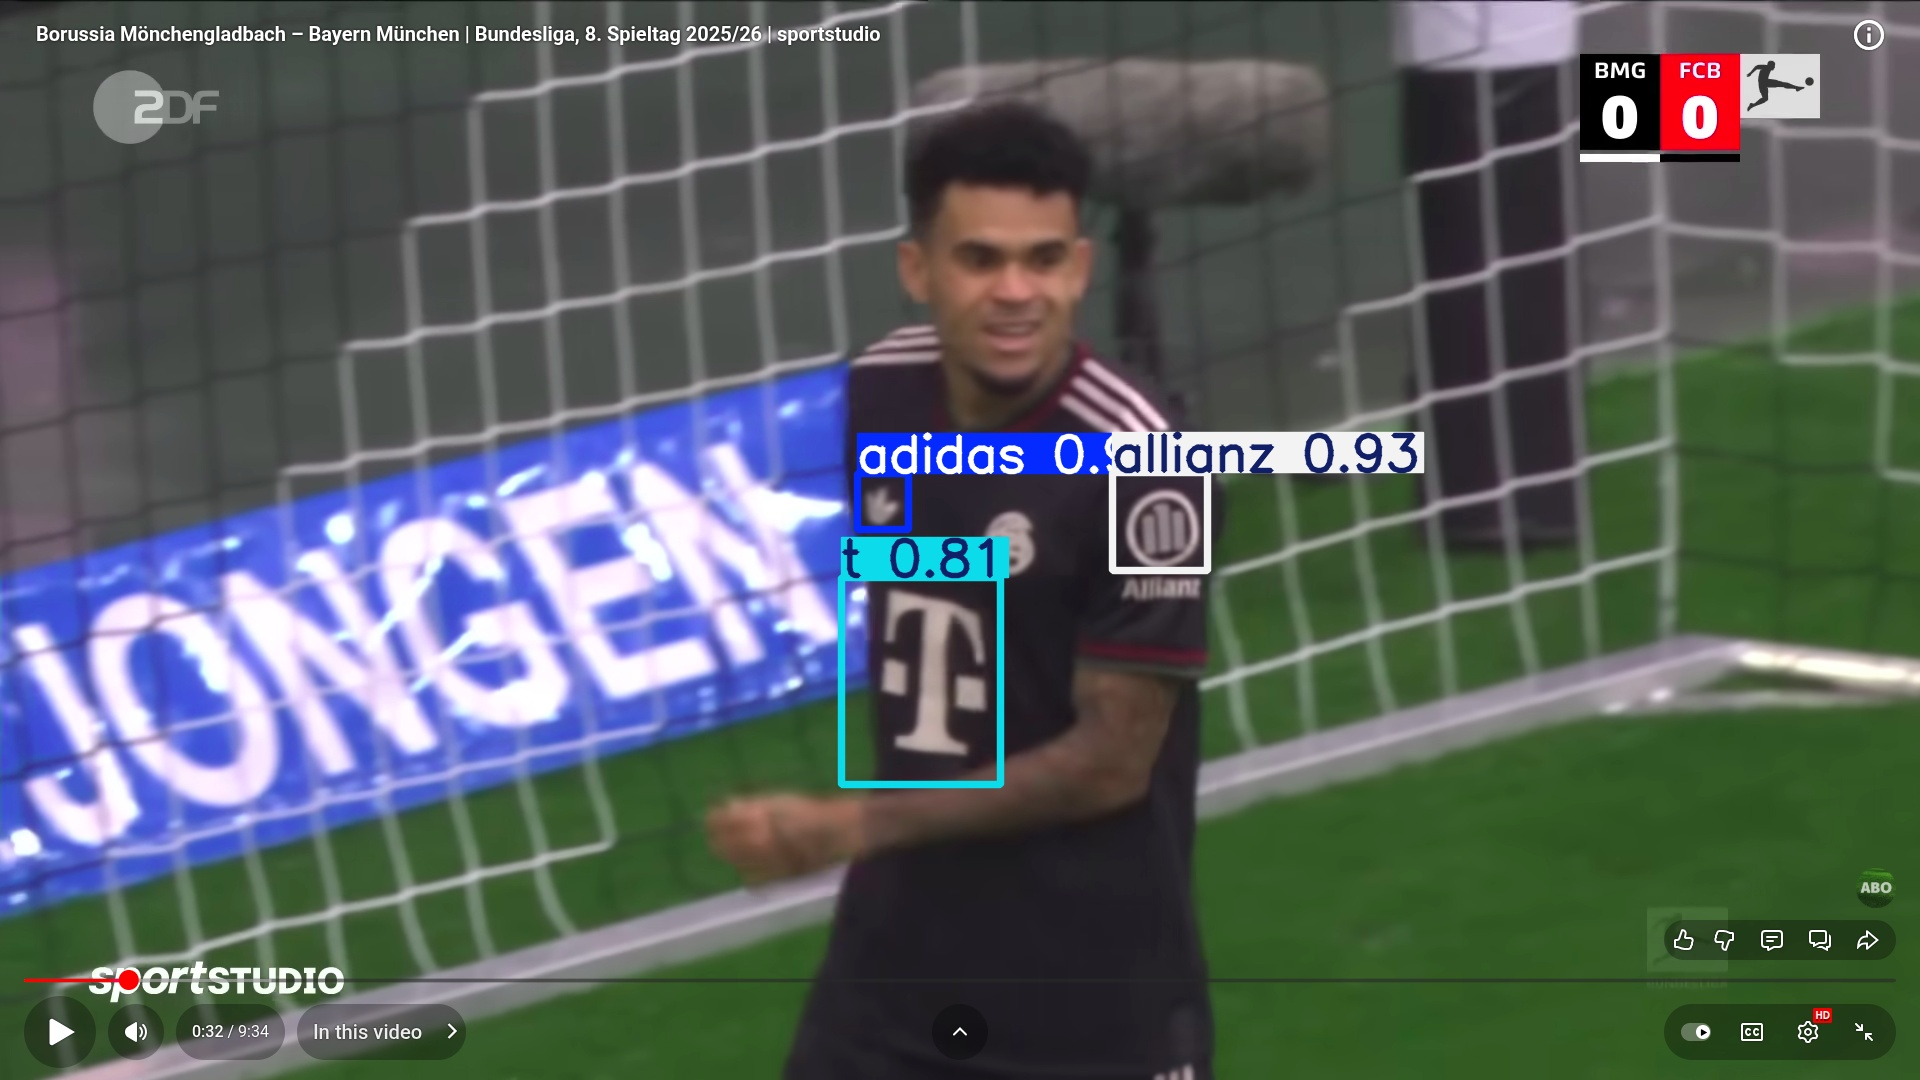

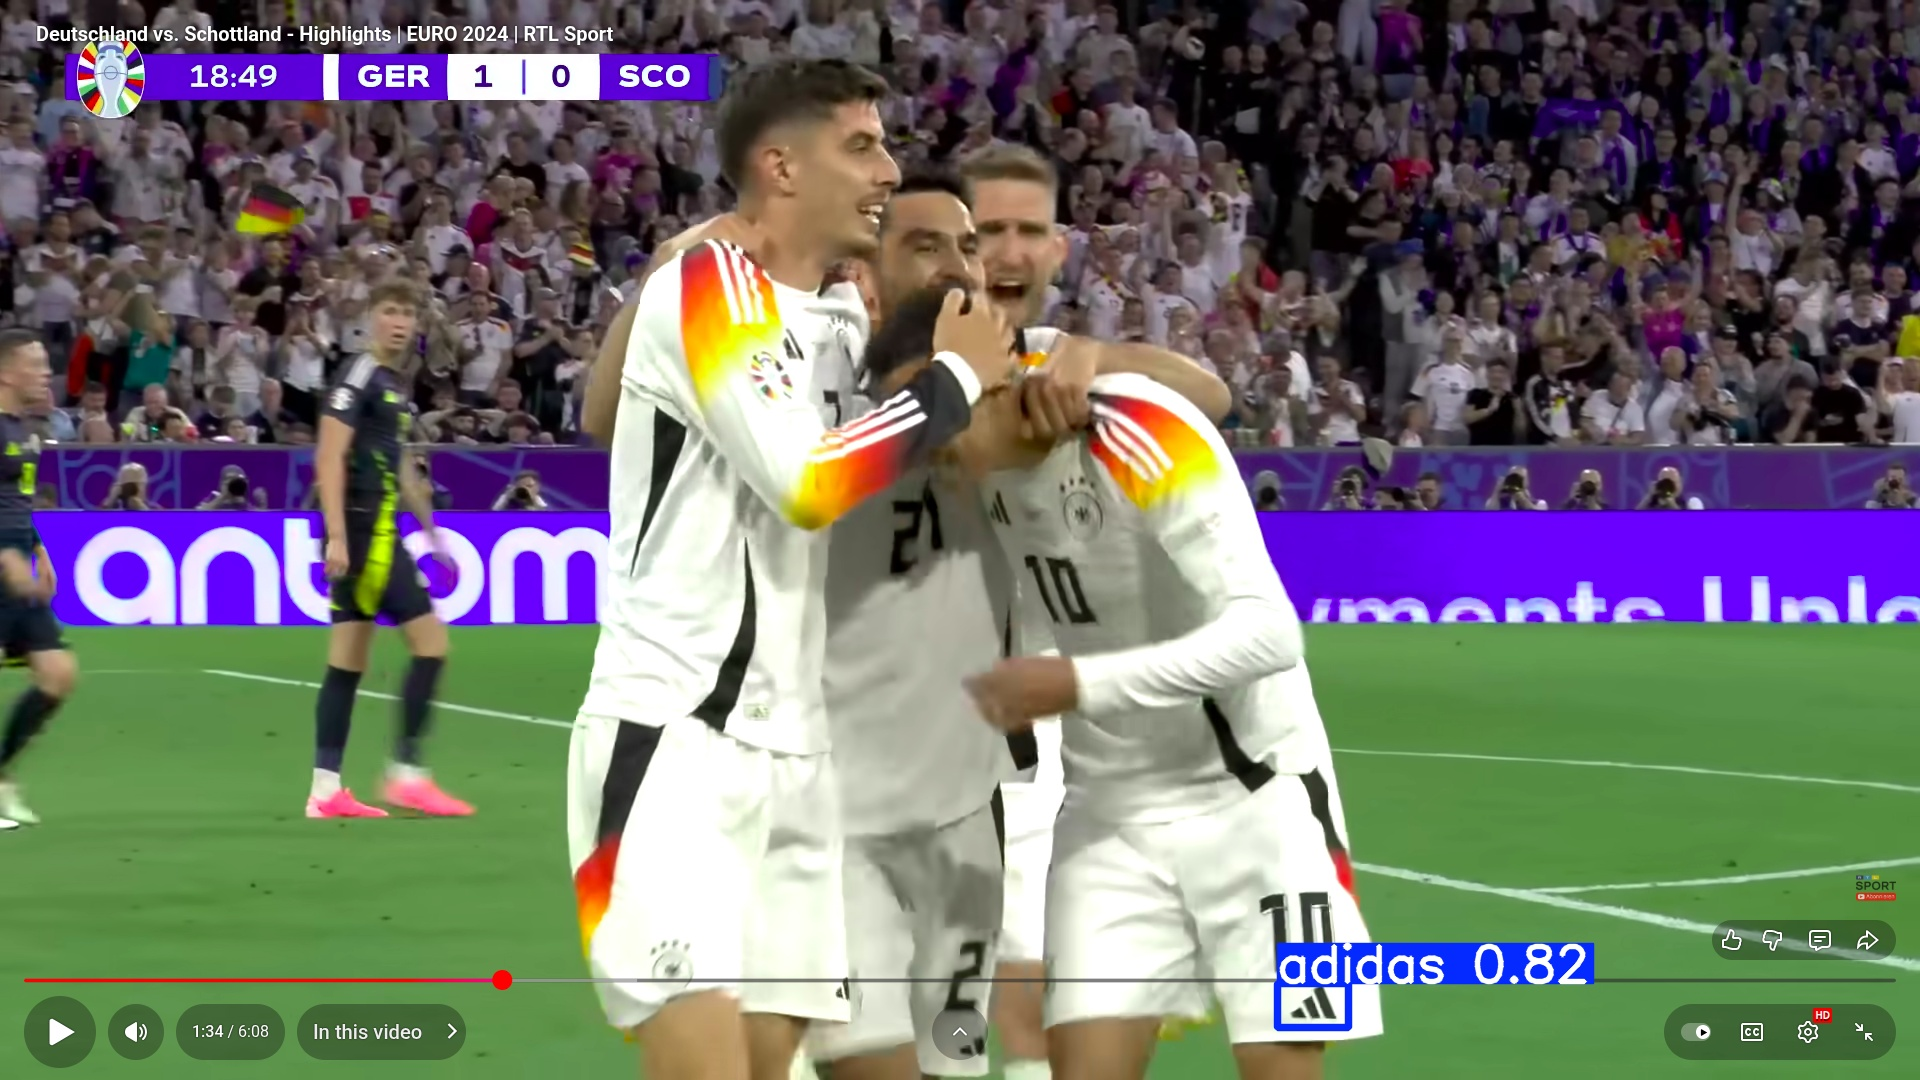

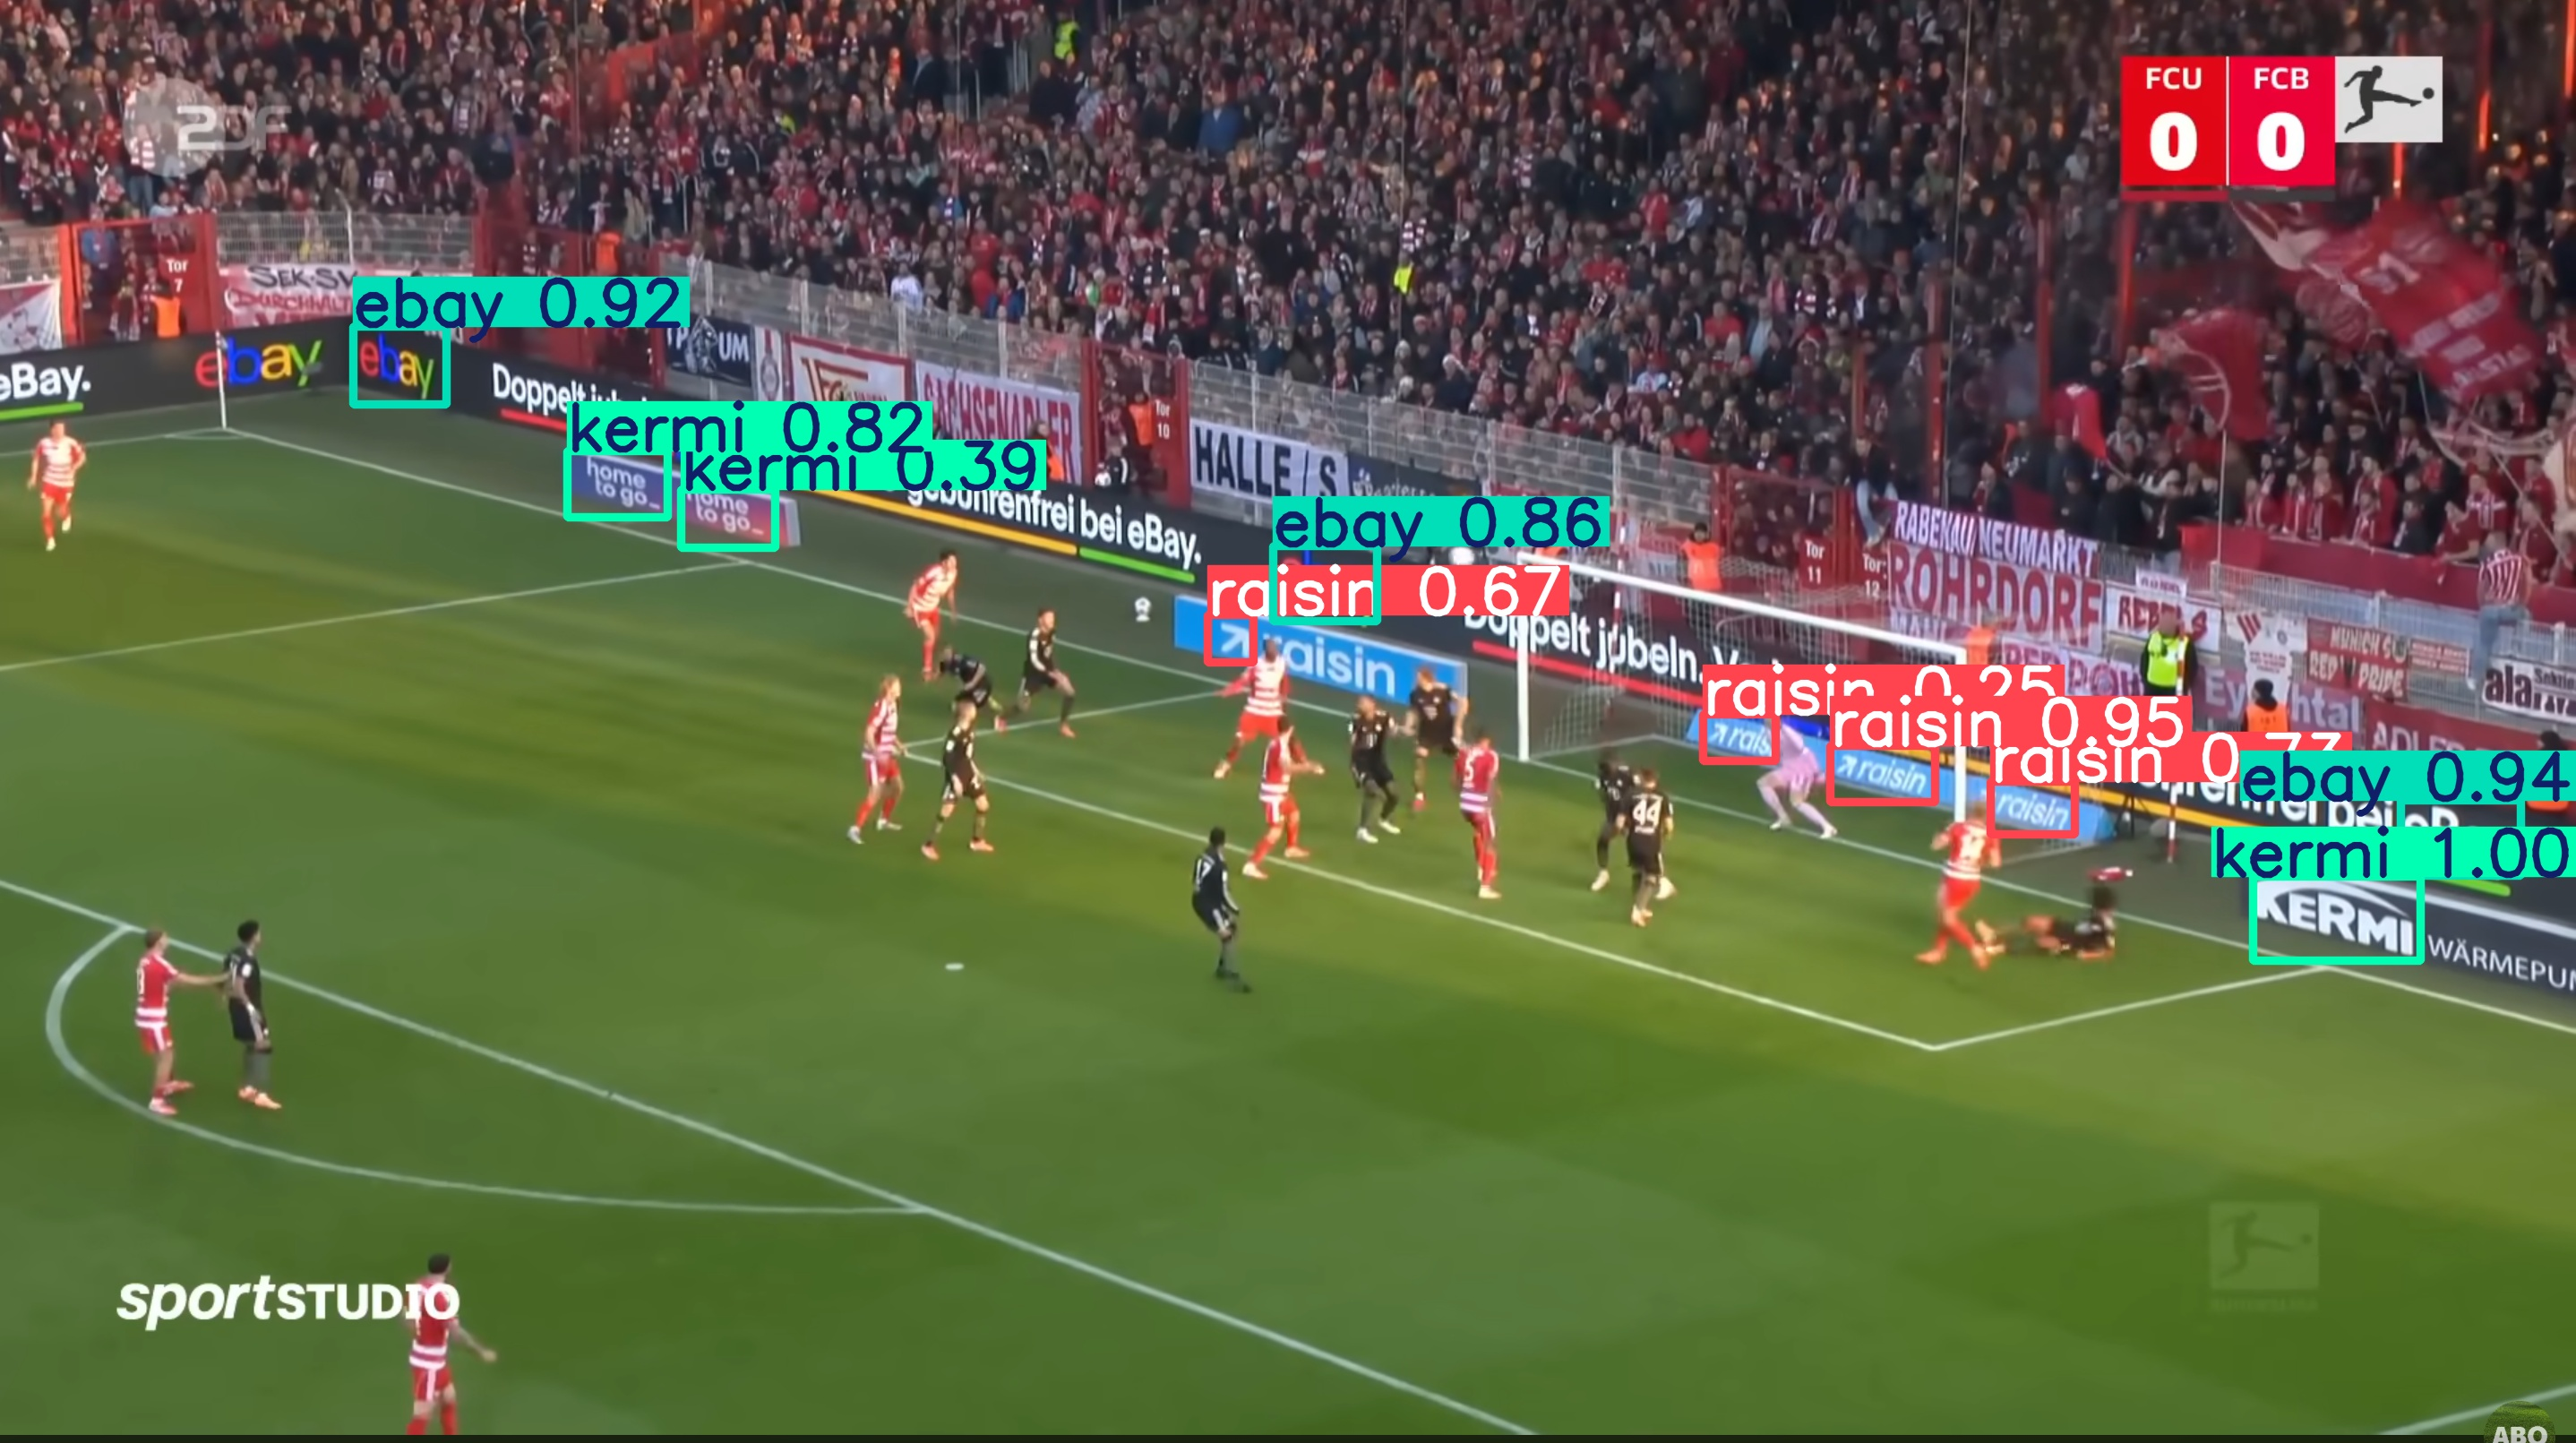

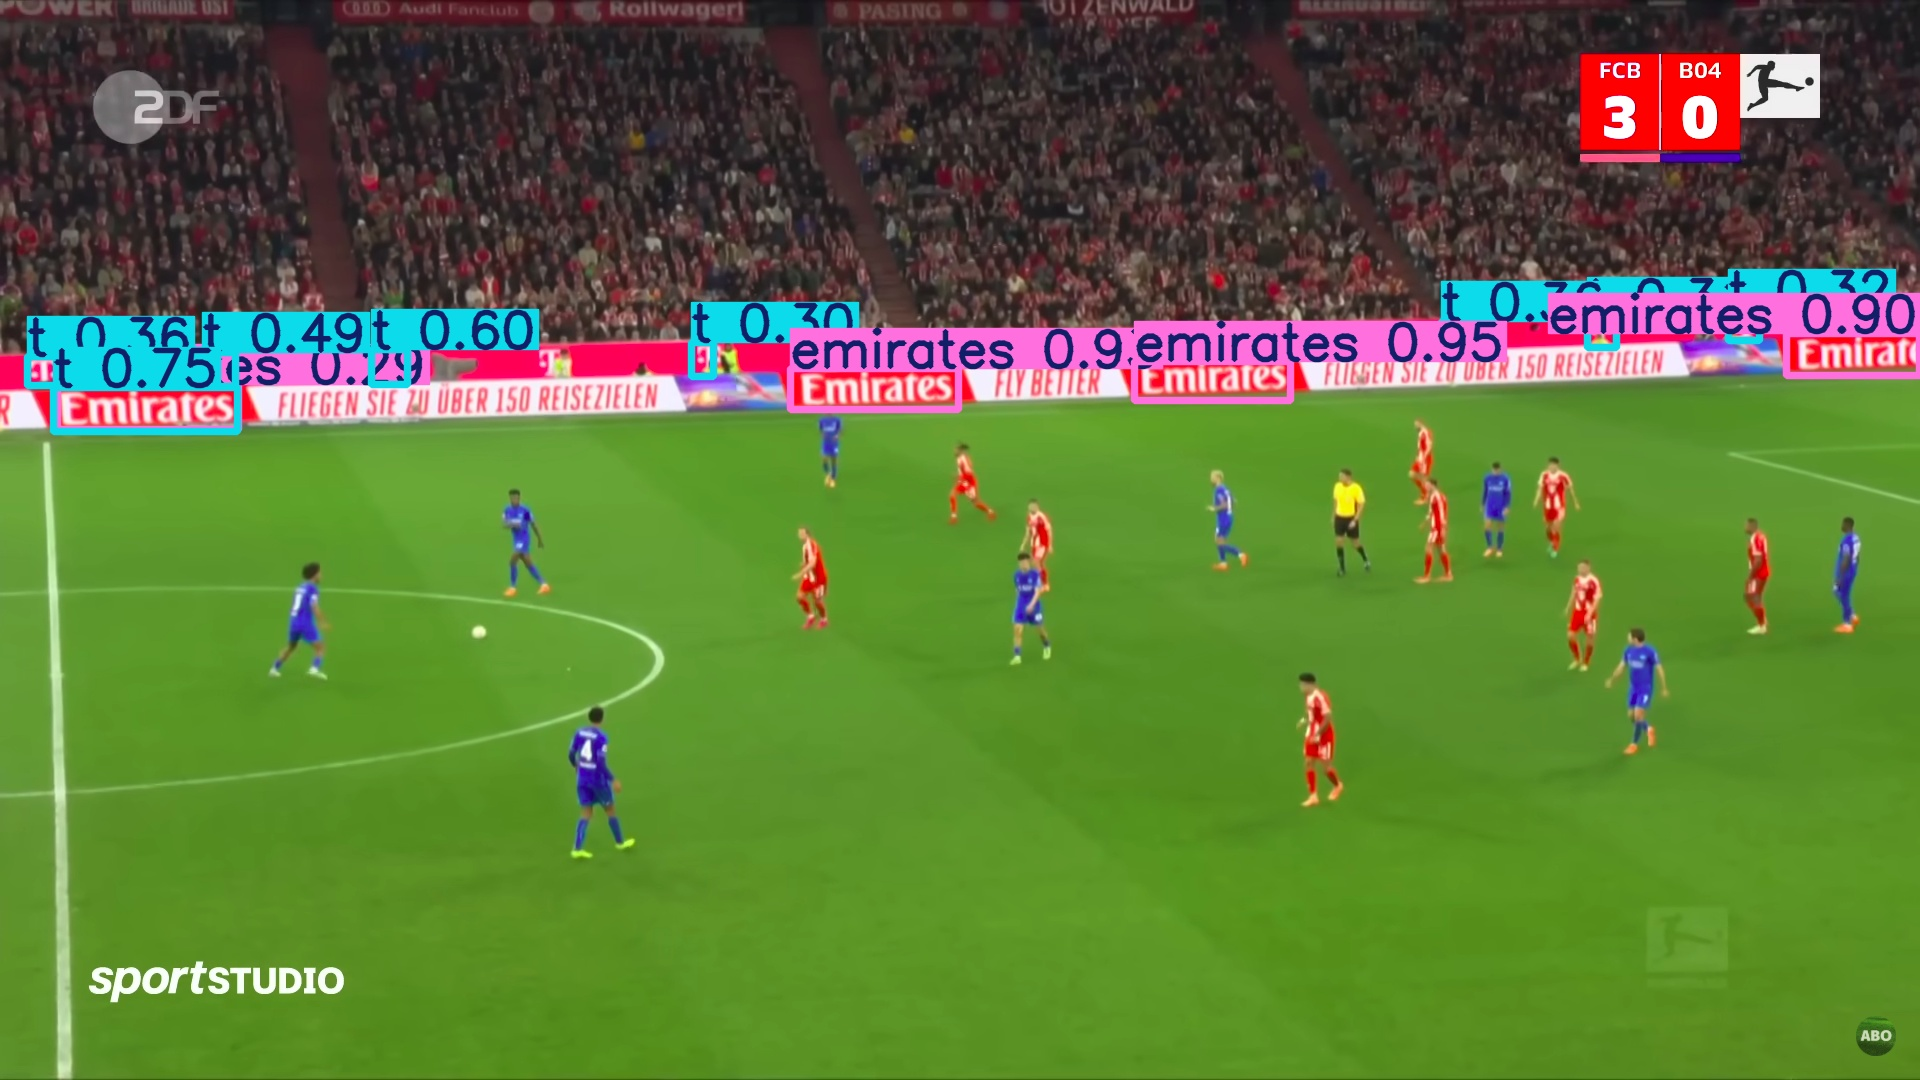

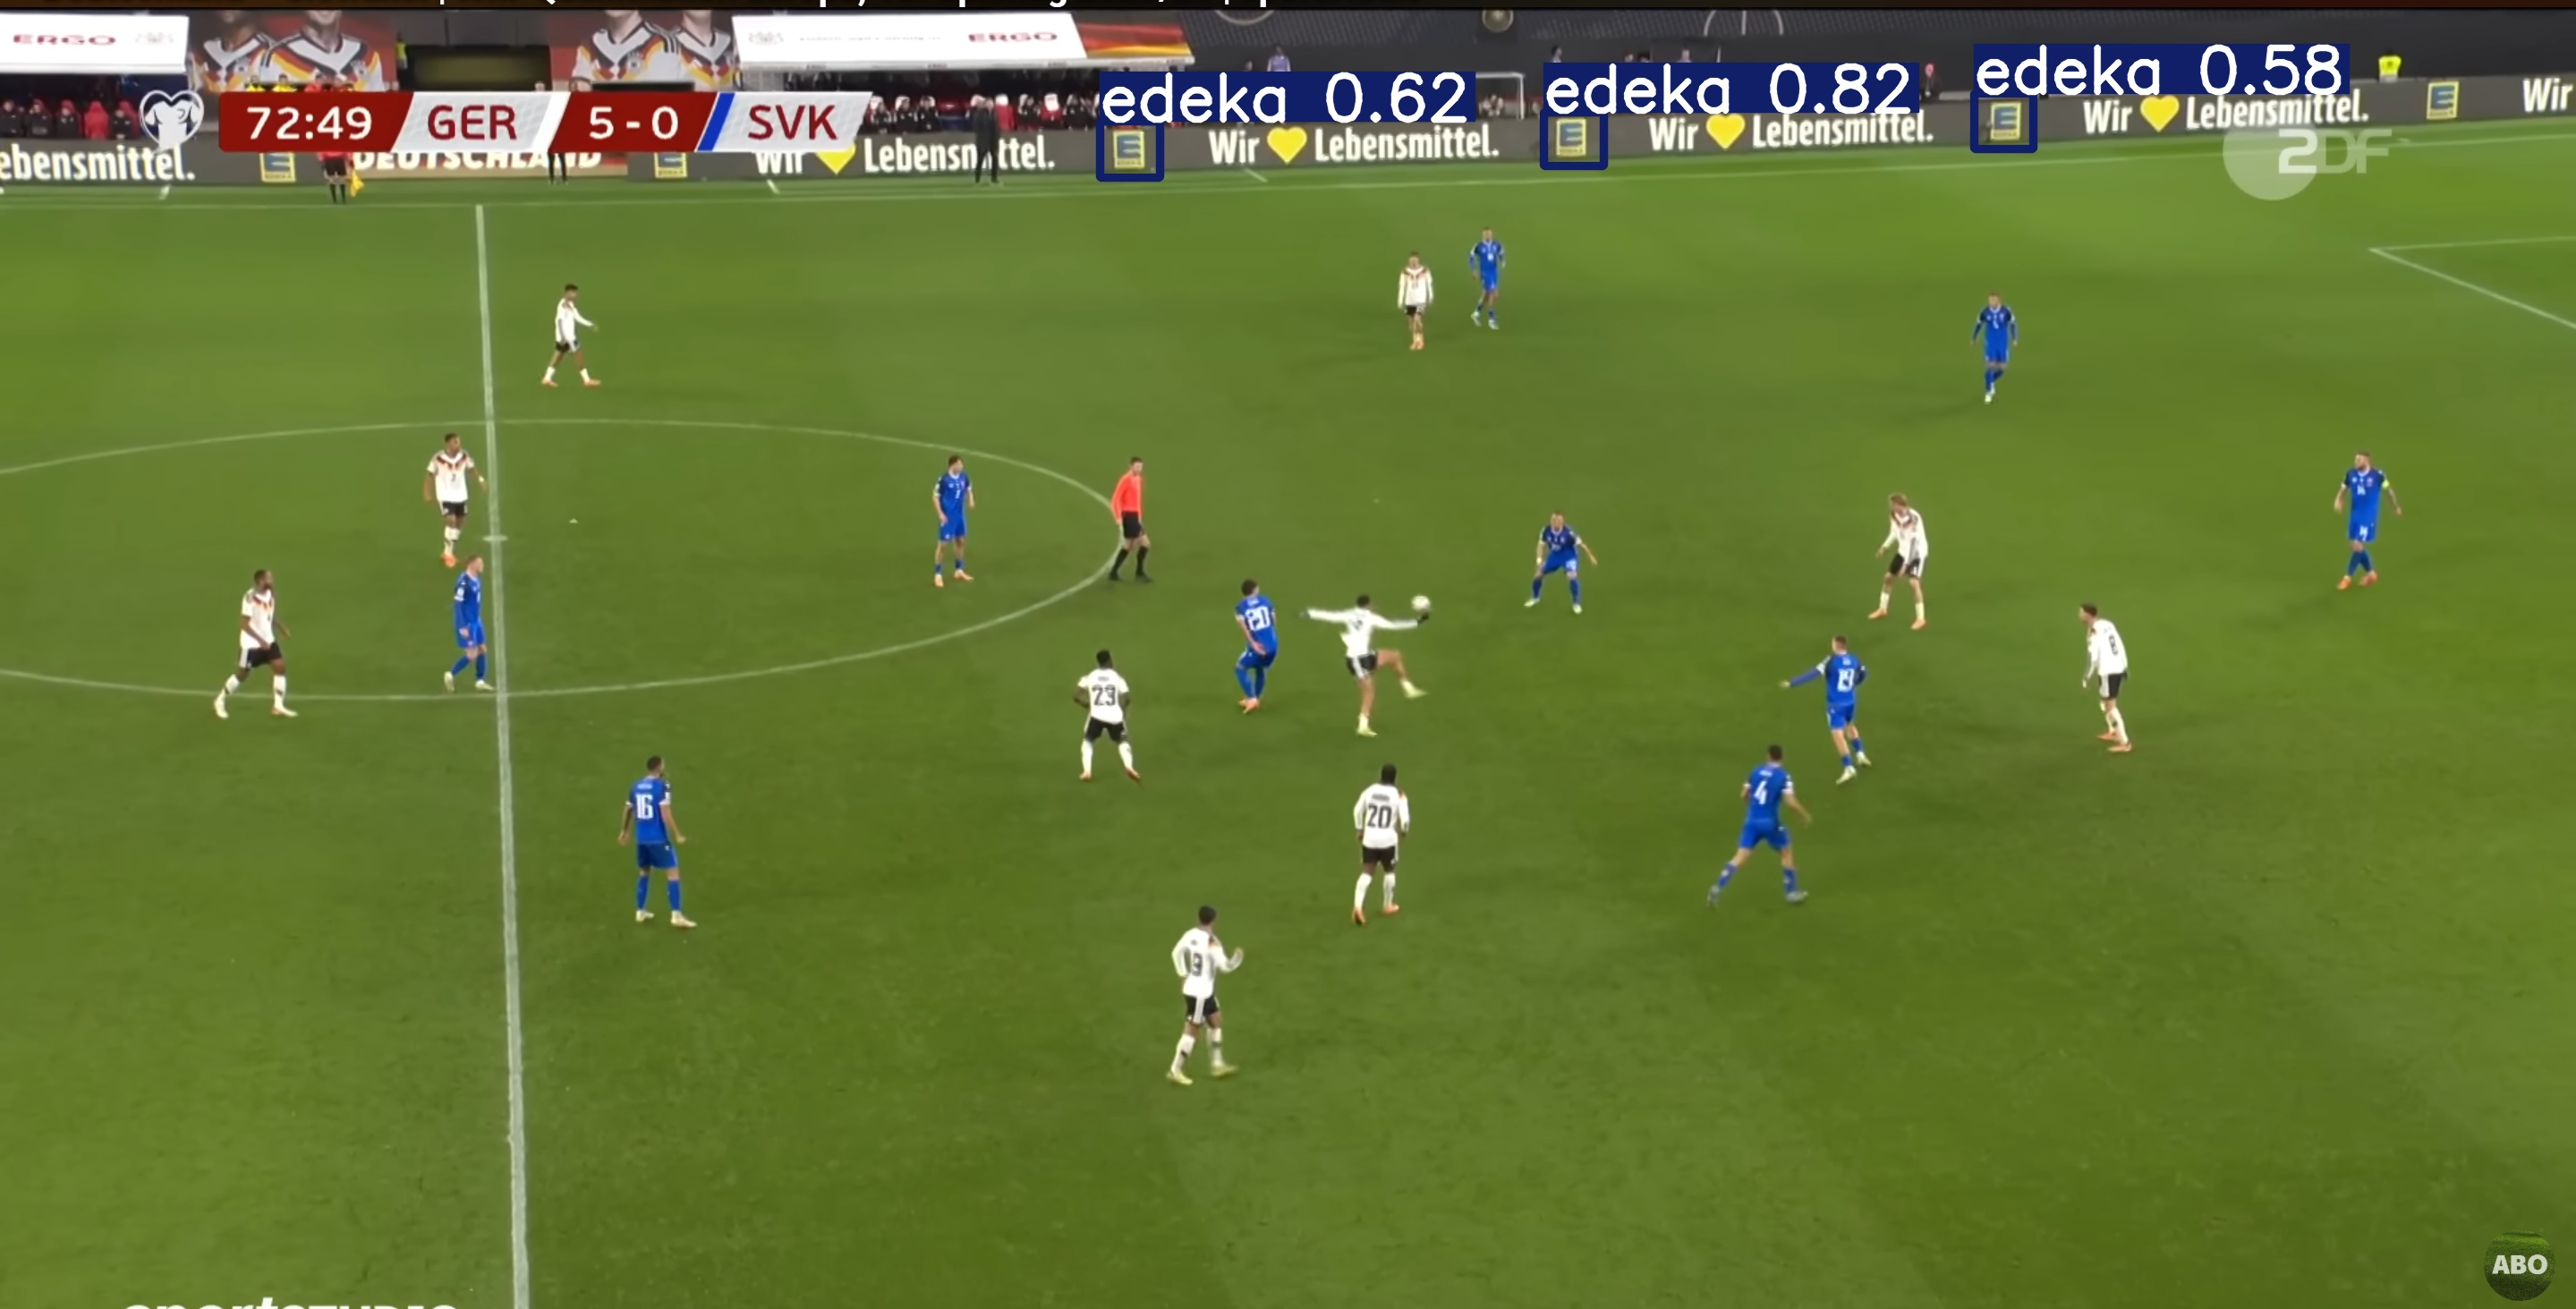

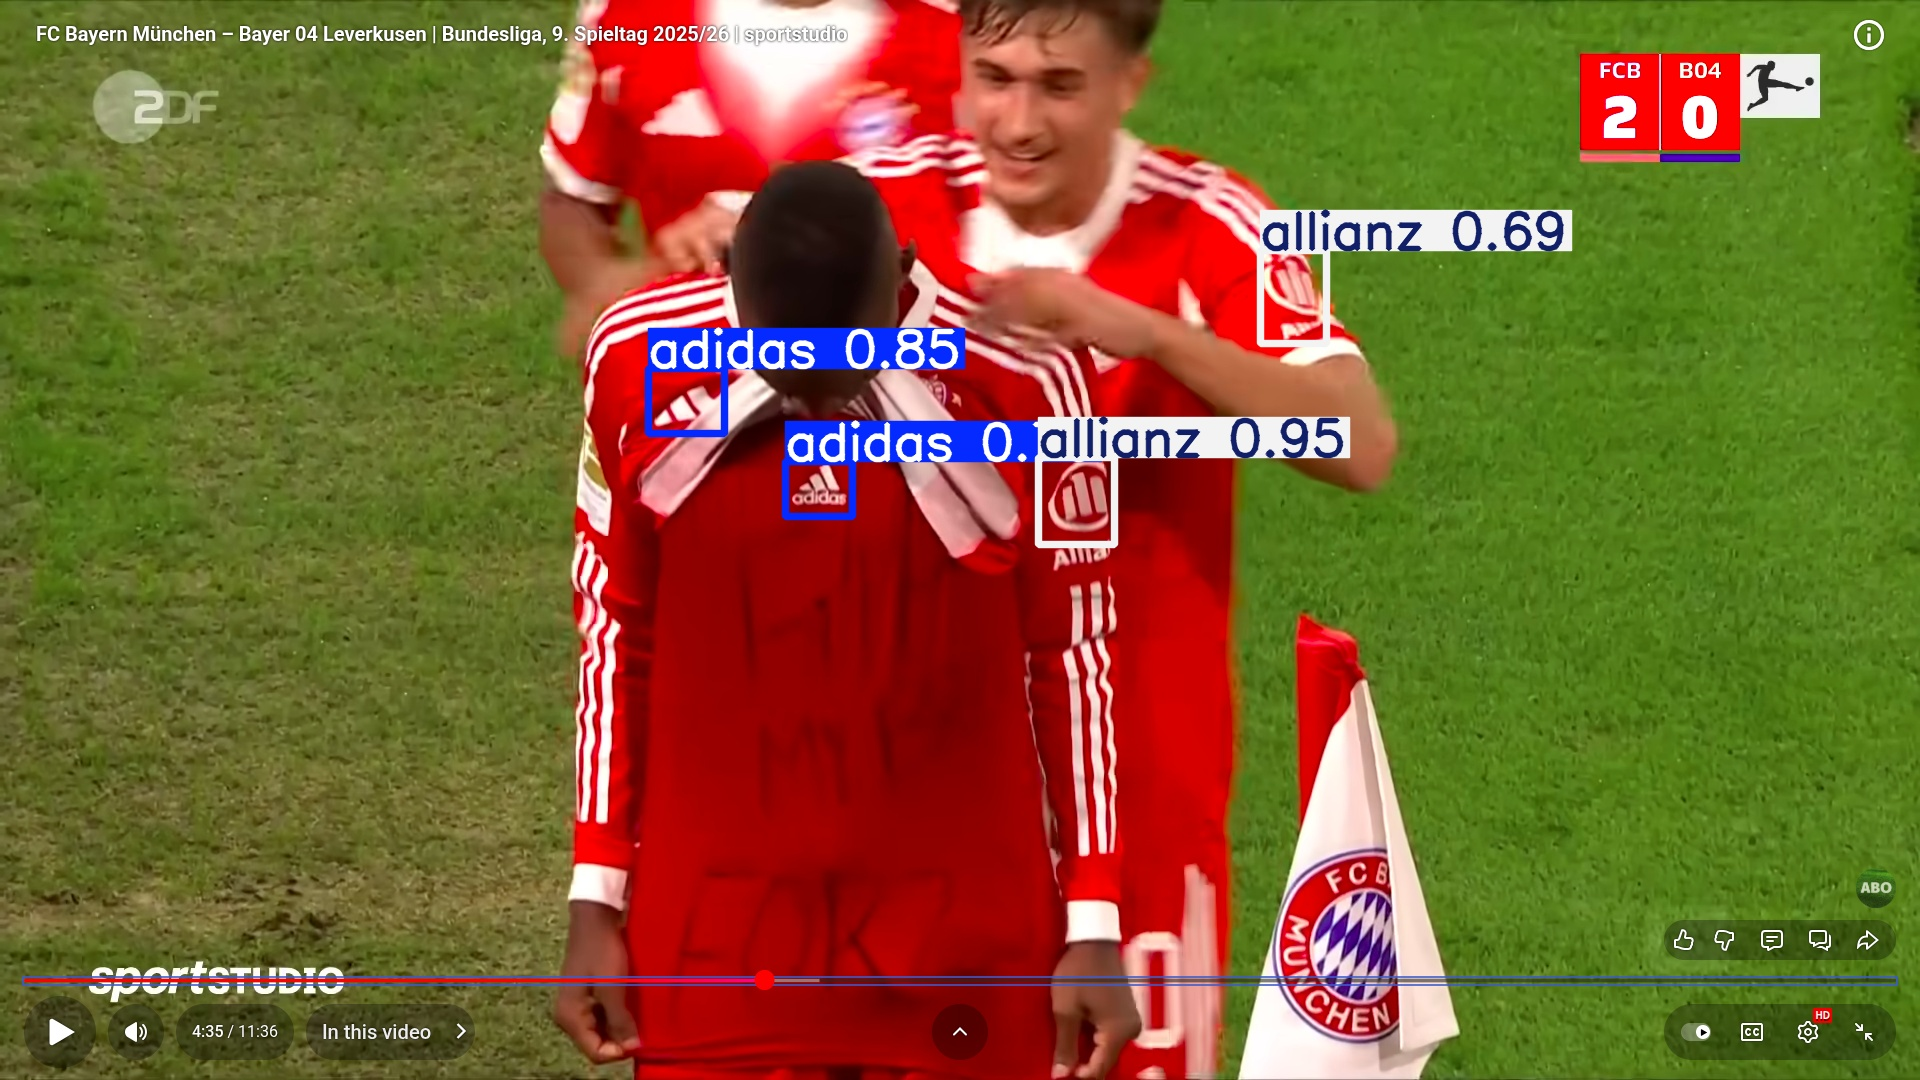

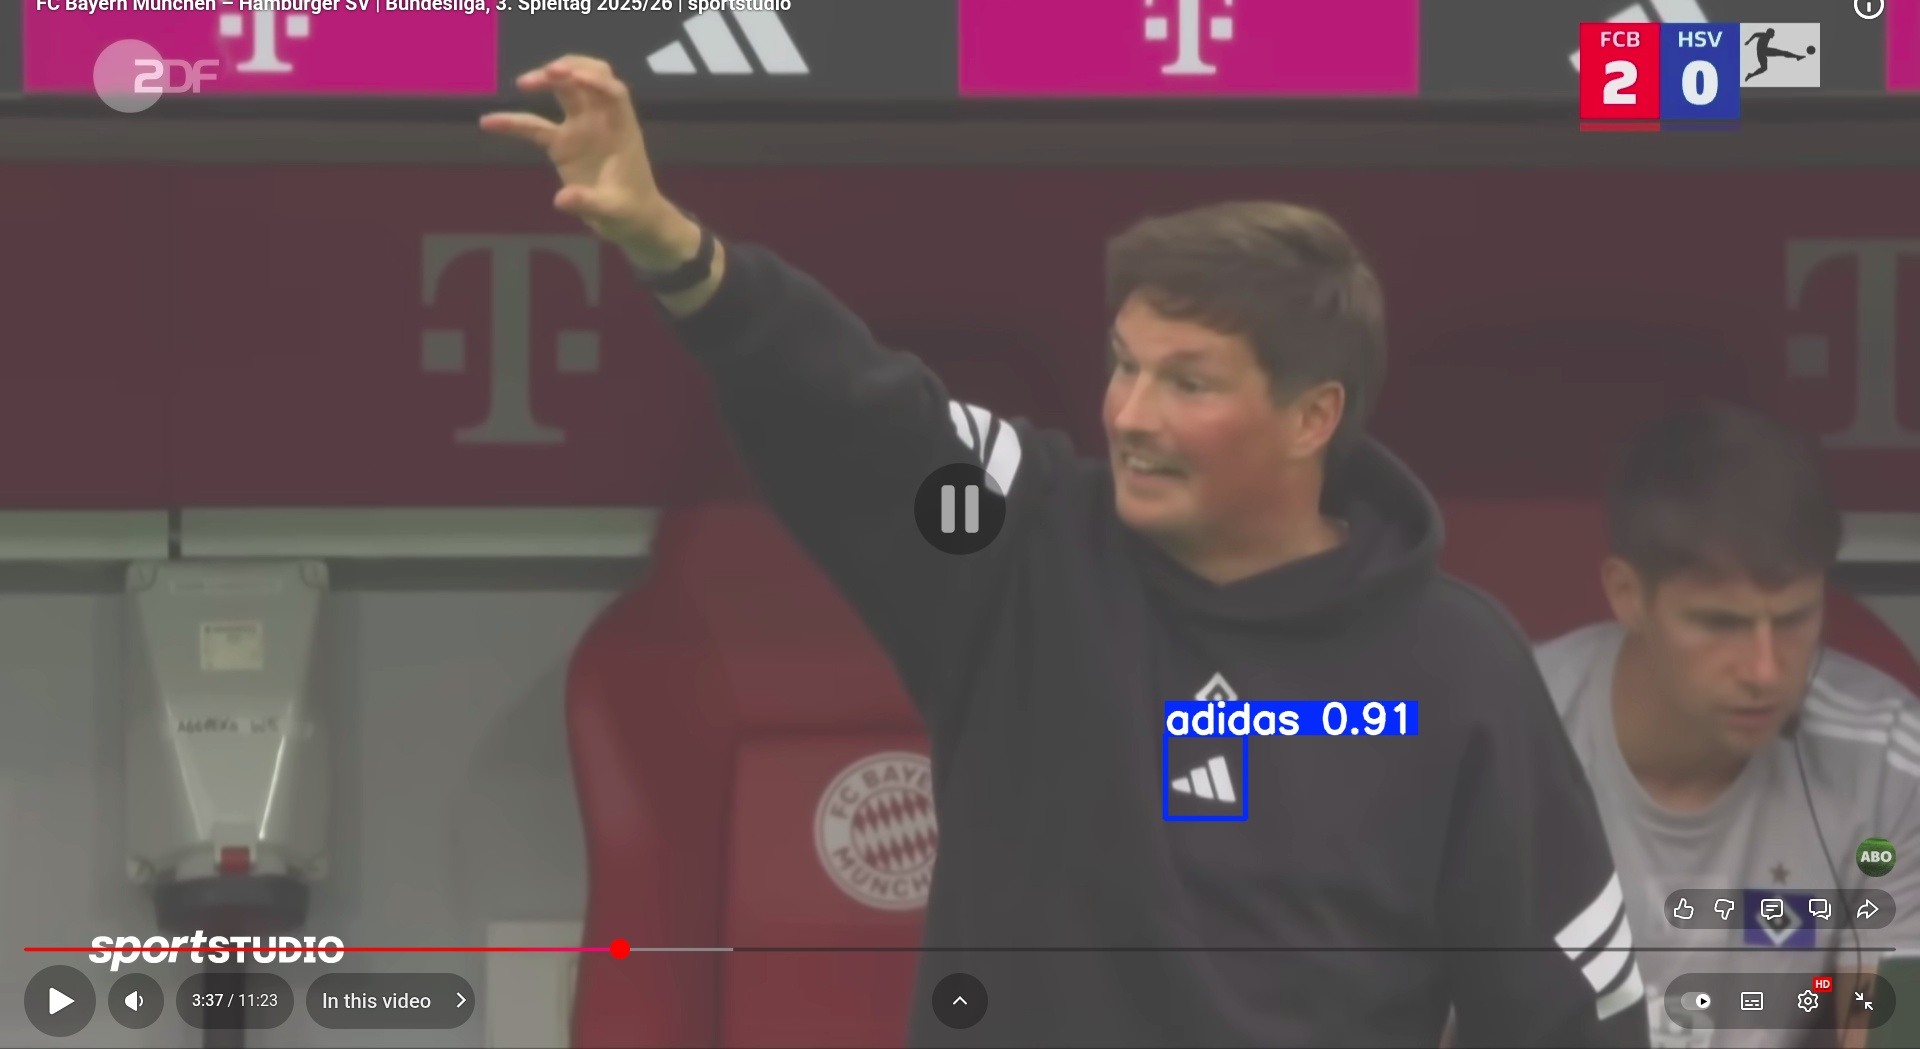

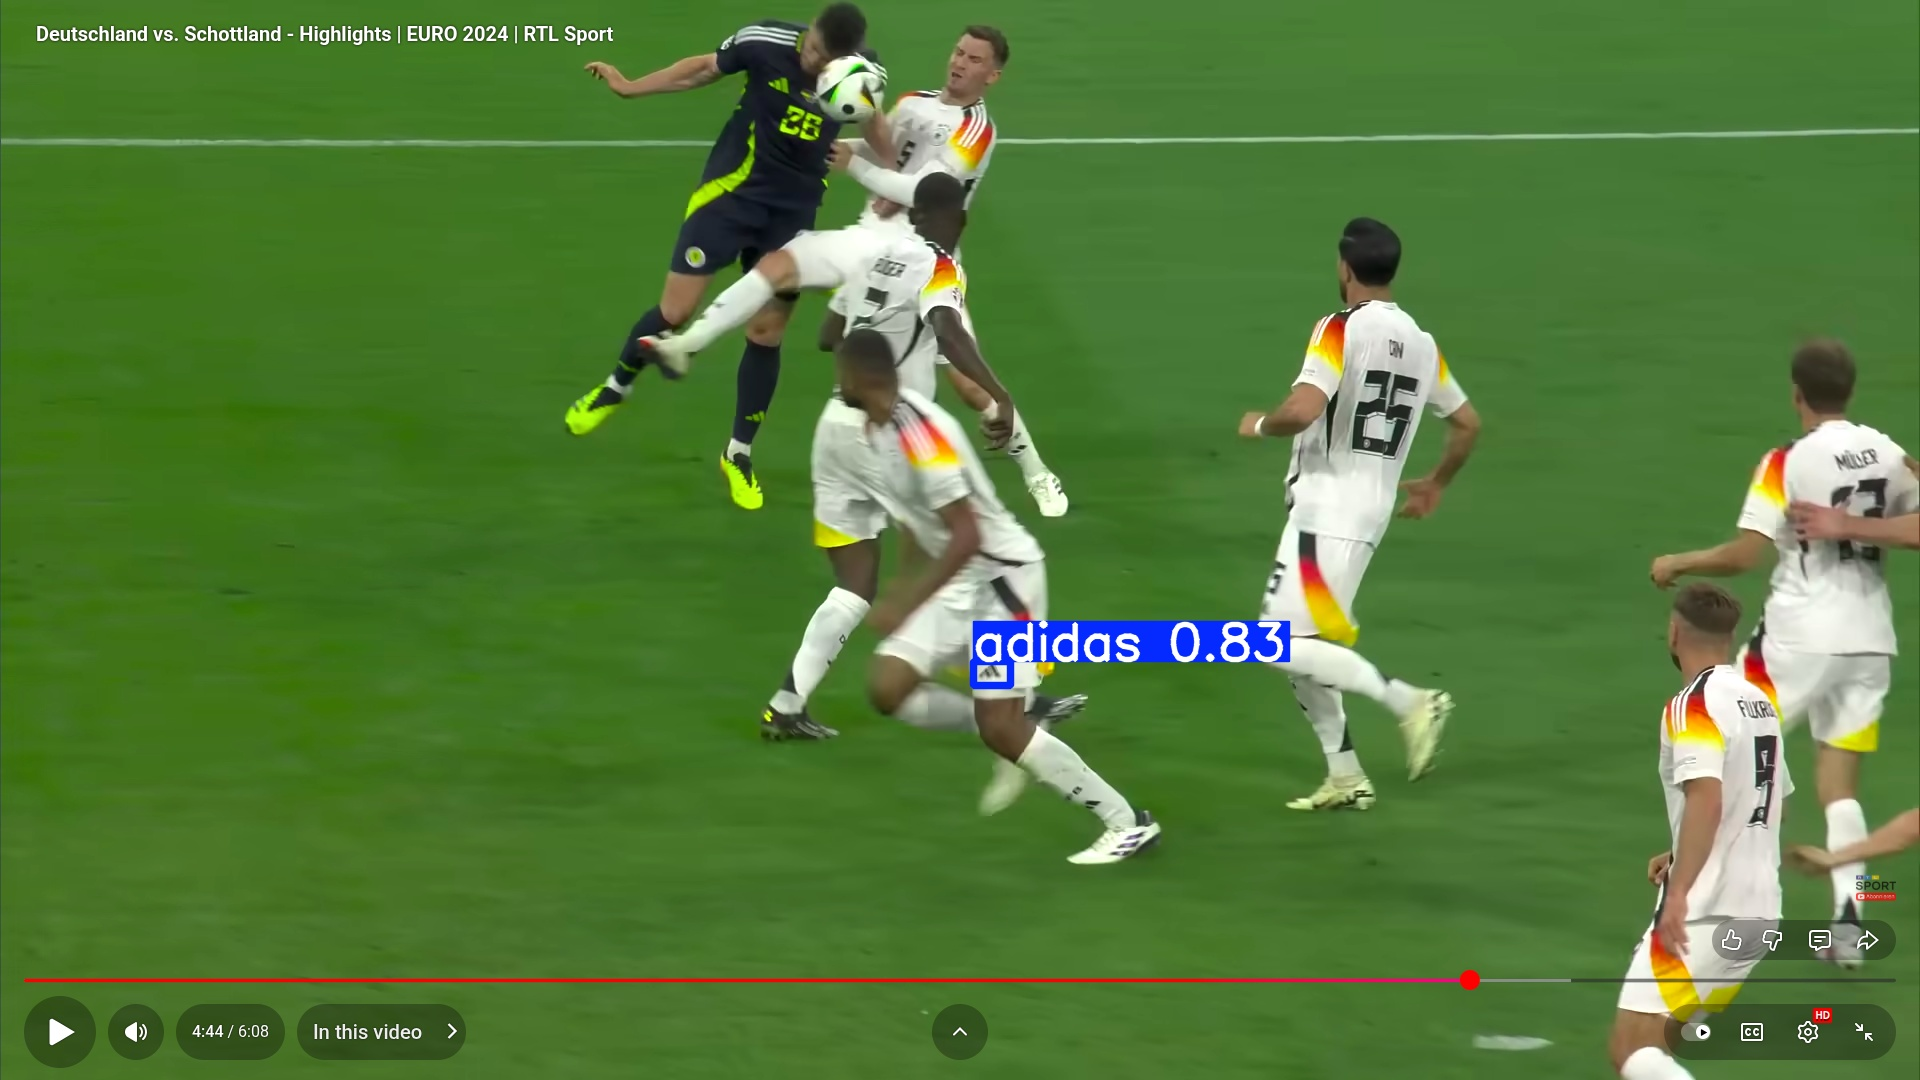

In [30]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:15]:
  display(Image(filename=image_path, height=400))
  print('\n')


#7.&nbsp;Deploy Model

## 7.1 Download YOLO Model

First, zip and download the trained model by running the code blocks below.

The code creates a folder named `my_model`, moves the model weights into it, and renames them from `best.pt` to `my_model.pt`. It also adds the training results in case you want to reference them later. It then zips the folder as `my_model.zip`.

## large model

In [ ]:
# # Create "my_model" folder to store model weights and train results
# !mkdir /content/large_model
# !cp /content/runs/detect/train/weights/best.pt /content/large_model/large_model.pt
# !cp -r /content/runs/detect/train /content/large_model

# # Zip into "my_model.zip"
# %cd large_model
# !zip /content/large_model.zip large_model.pt
# !zip -r /content/large_model.zip train
# %cd /content

mkdir: cannot create directory ‘/content/large_model’: File exists
/content/large_model
updating: large_model.pt (deflated 8%)
updating: train/ (stored 0%)
updating: train/labels.jpg (deflated 37%)
updating: train/confusion_matrix_normalized.png (deflated 20%)
updating: train/BoxP_curve.png (deflated 10%)
updating: train/results.png (deflated 7%)
updating: train/train_batch0.jpg (deflated 6%)
updating: train/weights/ (stored 0%)
updating: train/weights/last.pt (deflated 8%)
updating: train/weights/best.pt (deflated 8%)
updating: train/train_batch960.jpg (deflated 14%)
updating: train/args.yaml (deflated 53%)
updating: train/train_batch962.jpg (deflated 13%)
updating: train/train_batch2.jpg (deflated 4%)
updating: train/train_batch961.jpg (deflated 11%)
updating: train/results.csv (deflated 60%)
updating: train/BoxF1_curve.png (deflated 11%)
updating: train/confusion_matrix.png (deflated 20%)
updating: train/train_batch1.jpg (deflated 5%)
updating: train/BoxPR_curve.png (deflated 16%)
u

In [ ]:
# # This takes forever for some reason, you can also just download the model from the sidebar
# from google.colab import files

# files.download('/content/large_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## medium model

In [ ]:
# # Create "my_model" folder to store model weights and train results
# !mkdir /content/medium_model
# !cp /content/runs/detect/train/weights/best.pt /content/medium_model/medium_model.pt
# !cp -r /content/runs/detect/train /content/medium_model

# # Zip into "my_model.zip"
# %cd medium_model
# !zip /content/medium_model.zip medium_model.pt
# !zip -r /content/medium_model.zip train
# %cd /content

/content/medium_model
  adding: medium_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/labels.jpg (deflated 37%)
  adding: train/confusion_matrix_normalized.png (deflated 20%)
  adding: train/BoxP_curve.png (deflated 10%)
  adding: train/results.png (deflated 7%)
  adding: train/train_batch0.jpg (deflated 6%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/train_batch960.jpg (deflated 14%)
  adding: train/args.yaml (deflated 53%)
  adding: train/train_batch962.jpg (deflated 13%)
  adding: train/train_batch2.jpg (deflated 4%)
  adding: train/train_batch961.jpg (deflated 11%)
  adding: train/results.csv (deflated 60%)
  adding: train/BoxF1_curve.png (deflated 11%)
  adding: train/confusion_matrix.png (deflated 20%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/BoxPR_curve.png (deflated 16%)
  adding: train/val_batch0_pred.jpg (deflated 7%)
  adding: train/

In [ ]:
# # This takes forever for some reason, you can also just download the model from the sidebar
# from google.colab import files

# files.download('/content/medium_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## small model


In [ ]:
# # Create "my_model" folder to store model weights and train results
# !mkdir /content/small_model
# !cp /content/runs/detect/train/weights/best.pt /content/small_model/small_model.pt
# !cp -r /content/runs/detect/train /content/small_model

# # Zip into "my_model.zip"
# %cd small_model
# !zip /content/small_model.zip small_model.pt
# !zip -r /content/small_model.zip train
# %cd /content

mkdir: cannot create directory ‘/content/small_model’: File exists
/content/small_model
  adding: small_model.pt (deflated 8%)
updating: train/ (stored 0%)
updating: train/weights/ (stored 0%)
updating: train/args.yaml (deflated 53%)
  adding: train/labels.jpg (deflated 37%)
  adding: train/confusion_matrix_normalized.png (deflated 21%)
  adding: train/BoxP_curve.png (deflated 10%)
  adding: train/results.png (deflated 7%)
  adding: train/train_batch0.jpg (deflated 7%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/train_batch960.jpg (deflated 13%)
  adding: train/train_batch962.jpg (deflated 13%)
  adding: train/train_batch2.jpg (deflated 4%)
  adding: train/train_batch961.jpg (deflated 12%)
  adding: train/results.csv (deflated 60%)
  adding: train/BoxF1_curve.png (deflated 11%)
  adding: train/confusion_matrix.png (deflated 20%)
  adding: train/train_batch1.jpg (deflated 5%)
  adding: train/BoxPR_curve.png (deflated 16%)
 

In [ ]:
# # This takes forever for some reason, you can also just download the model from the sidebar
# from google.colab import files

# files.download('/content/small_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>